Now we'll preprocess the data with the objective to obtain features that can either support or debunk the hypothesis that __there may be a systemic inbalance between prison sentences among sociodemographic groups of a specific kind (depending on gender, race, age or others)__ .

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
prison_sentences = pd.read_csv('./data/prison_sentences.csv')
print("Shape: ", prison_sentences.shape)
print("Columns: ", prison_sentences.columns)
prison_sentences.head()

C:\Users\ragal\AppData\Local\Temp\ipykernel_12212\2448589007.py:1: DtypeWarning: Columns (100,152,162,181,201,206,211,216,221,223,240,252,257,264,269,276,279,281,288,291,293,329,334,335,336,337,338,339,340,341,342,343,344,345,346,347,356,357,358,362,363,367,368,369,370,371,372,373,374,375,378,379,380,381,382,383,384,385,386,387,388,389,390,395,396,397,398,399,400,401,402,405,406,407,408,409,410,411,412,413,414,415,416,417,422,423,424,533,534,535,536,537,538,540,541,542,543,544,546,547,549,550,552,553) have mixed types. Specify dtype option on import or set low_memory=False.
  prison_sentences = pd.read_csv('./data/prison_sentences.csv')


Shape:  (595850, 557)
Columns:  Index(['CIRCDIST', 'CASLGKY', 'SAFETY', 'ZONE', 'AMTFINEC', 'AMTREST',
       'AMTTOTAL', 'COSTSUP', 'FINE', 'TOTREST',
       ...
       'Degree4', 'DegreeYear4', 'School5', 'Degree5', 'DegreeYear5',
       'ProfessionalCareer', 'OtherNominations/RecessAppointments', 'STARTYR',
       'ENDYR', 'DataSource'],
      dtype='object', length=557)


,CIRCDIST,CASLGKY,SAFETY,ZONE,AMTFINEC,AMTREST,AMTTOTAL,COSTSUP,FINE,TOTREST,...,Degree4,DegreeYear4,School5,Degree5,DegreeYear5,ProfessionalCareer,OtherNominations/RecessAppointments,STARTYR,ENDYR,DataSource
0,1,009011100123CR0,NaN,D,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,"Law clerk, Hon. Harrison L. Winter, U.S. Court...",Nominated to U.S. District Court for the Distr...,2011.0,2020.0,1
1,1,009011100141CR0,NaN,B,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,"Law clerk, Hon. Harrison L. Winter, U.S. Court...",Nominated to U.S. District Court for the Distr...,2011.0,2020.0,1
2,1,009011100169CR0,NaN,B,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,"Law clerk, Hon. Harrison L. Winter, U.S. Court...",Nominated to U.S. District Court for the Distr...,2011.0,2020.0,1
3,1,009011100196CR0,NaN,D,0.0,469869.0,469869.0,0.0,0.0,469869.0,...,NaN,NaN,NaN,NaN,NaN,"Law clerk, Hon. Harrison L. Winter, U.S. Court...",Nominated to U.S. District Court for the Distr...,2011.0,2020.0,1
4,1,009011100206CR0,NaN,D,0.0,99158.0,99158.0,0.0,0.0,99158.0,...,NaN,NaN,NaN,NaN,NaN,"Law clerk, Hon. Harrison L. Winter, U.S. Court...",Nominated to U.S. District Court for the Distr...,2011.0,2020.0,1


Selecting columns specific to be predictors that don't contain information of the sentence per se.

In [3]:
cols_to_use = {
    'SENTTOT': 'prisonSentence_months',

    'CIRCDIST': 'courtDistrict_id',
    'SAFETY': 'drugCase_safetyValve',
    'AGE': 'defendant_age',
    'CHAP2': 'offenseLevel_plusChapter2SOCs',
    'CITWHERE': 'defendant_countryOfCitizenship',
    'CRIMHIST': 'defendant_has_criminalHistory',
    'DRUGTYP1': 'drug_types',
    'DSPLEA': 'pleaAgreement_documentStatus',
    'EDUCATN': 'defendant_educationLevel',
    'MONRACE': 'defendant_race',
    'MONSEX': 'defendant_gender',
    'POINT1': 'defendant_pastSentences_last60days',
    'POINT2': 'defendant_pastSentences_last60to13months',
    'POINT3': 'defendant_pastSentences_13months',
    'WEAPON': 'SOC_weaponEnhancement',
    'SENTYR': 'sentence_year',
    'FILEDATE': 'case_filling_date',
    'appointedby': 'judge_appointedBy',
    'Gender': 'judge_gender',
    'PRESENT': 'preSentence_detention_status',
    'NOUSTAT': 'case_uniqueStatutes',
    'FLIGHT1': 'levelsAdded_flightFromLawEnforcement',
    'MITROL1': 'levelsSubstractted_mitigatingRole',
    'OBSTRC1': 'levelsAdded_obstructionOfJustice',
    'OFFVCT1': 'levelsAdded_victimIsLawEnforcement',
    'RSTRVC1': 'levelsAdded_victimRestraint',
    'TEROR1': 'levelsAdded_internationalTerrorism',
    'USKID1': 'levelsAdded_useOfAMinor',
    'VULVCT1': 'levelsAdded_hateCrime',
}

In [4]:
prison_sentences = prison_sentences[list(cols_to_use.keys())]
print("Shape: ", prison_sentences.shape)
print("Columns: ", prison_sentences.columns)
prison_sentences.head()

Shape:  (595850, 30)
Columns:  Index(['SENTTOT', 'CIRCDIST', 'SAFETY', 'AGE', 'CHAP2', 'CITWHERE', 'CRIMHIST',
       'DRUGTYP1', 'DSPLEA', 'EDUCATN', 'MONRACE', 'MONSEX', 'POINT1',
       'POINT2', 'POINT3', 'WEAPON', 'SENTYR', 'FILEDATE', 'appointedby',
       'Gender', 'PRESENT', 'NOUSTAT', 'FLIGHT1', 'MITROL1', 'OBSTRC1',
       'OFFVCT1', 'RSTRVC1', 'TEROR1', 'USKID1', 'VULVCT1'],
      dtype='object')


,SENTTOT,CIRCDIST,SAFETY,AGE,CHAP2,CITWHERE,CRIMHIST,DRUGTYP1,DSPLEA,EDUCATN,...,PRESENT,NOUSTAT,FLIGHT1,MITROL1,OBSTRC1,OFFVCT1,RSTRVC1,TEROR1,USKID1,VULVCT1
0,24.0,1,NaN,26.0,24.0,32.0,1.0,NaN,1.0,32.0,...,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.0,1,NaN,29.0,12.0,32.0,1.0,NaN,5.0,5.0,...,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1,NaN,36.0,8.0,32.0,1.0,NaN,5.0,11.0,...,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,1,NaN,61.0,22.0,211.0,0.0,NaN,1.0,34.0,...,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18.0,1,NaN,43.0,14.0,211.0,1.0,NaN,1.0,34.0,...,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
prison_sentences = prison_sentences.rename(columns=cols_to_use)
print(prison_sentences.columns)

Index(['prisonSentence_months', 'courtDistrict_id', 'drugCase_safetyValve',
       'defendant_age', 'offenseLevel_plusChapter2SOCs',
       'defendant_countryOfCitizenship', 'defendant_has_criminalHistory',
       'drug_types', 'pleaAgreement_documentStatus',
       'defendant_educationLevel', 'defendant_race', 'defendant_gender',
       'defendant_pastSentences_last60days',
       'defendant_pastSentences_last60to13months',
       'defendant_pastSentences_13months', 'SOC_weaponEnhancement',
       'sentence_year', 'case_filling_date', 'judge_appointedBy',
       'judge_gender', 'preSentence_detention_status', 'case_uniqueStatutes',
       'levelsAdded_flightFromLawEnforcement',
       'levelsSubstractted_mitigatingRole', 'levelsAdded_obstructionOfJustice',
       'levelsAdded_victimIsLawEnforcement', 'levelsAdded_victimRestraint',
       'levelsAdded_internationalTerrorism', 'levelsAdded_useOfAMinor',
       'levelsAdded_hateCrime'],
      dtype='object')


## Feature engineering

In [6]:
prison_sentences['drugCase_safetyValve'] = prison_sentences['drugCase_safetyValve'].apply(lambda x: x if x > 0 else 0)

In [7]:
prison_sentences['drug_types'] = prison_sentences['drug_types'].fillna(0)

In [8]:
# dropping rows with nans
prison_sentences.dropna(inplace=True, axis=0, how='any')

In [9]:
president_parties = {
    'Obama': 'Democrat',
    'Clinton': 'Democrat',
    'G.W. Bush': 'Republican',
    'Carter': 'Democrat',
    'Reagan': 'Republican',
    'Trump': 'Republican',
    'G.H.W. Bush': 'Republican',
    'Nixon': 'Republican',
    'L. Johnson': 'Democrat',
    'Eisenhower': 'Republican',
    'Ford': 'Republican',
    'Kennedy': 'Democrat',
    'Eisenhower Nixon': 'Republican',   # Both Eisenhower and Nixon were Republicans
    'Operation of law': 'None'          # This case is not applicable to a president
}

In [10]:
# political leaning of the judge based on the president who appointed them:
# 0 if they were not appointed by a president (Operation of law)
# 1 if appointed by a Republican president
# -1 if appointed by a Democrat president
prison_sentences['judge_appointment_politicalLeaning'] = \
    prison_sentences['judge_appointedBy'].apply(lambda x: 0 if x == 'Operation of law' else 1) * \
    prison_sentences['judge_appointedBy'].apply(lambda x: 1 if president_parties[x] == 'Republican' else -1)
prison_sentences.drop(columns=['judge_appointedBy'], inplace=True)

In [11]:
object_cols = prison_sentences.select_dtypes(include='object').columns.tolist()
print(f"Object columns: {object_cols}\n")

for col in object_cols:
    print(f"Unique values in '{col}':")
    print(f"Number of unique values: {prison_sentences[col].nunique()}")
    print(prison_sentences[col].unique())
    print("-" * 50)

# written by Claude Sonnet 4 in Copilot using the following prompt:
# "Print all unique values in columns of type object"

Object columns: ['case_filling_date', 'judge_gender']

Unique values in 'case_filling_date':
Number of unique values: 5587
['04/26/2011' '05/10/2011' '05/26/2011' ... '02/15/2003' '08/05/1994'
 '10/14/1997']
--------------------------------------------------
Unique values in 'judge_gender':
Number of unique values: 2
['Female' 'Male']
--------------------------------------------------


In [12]:
prison_sentences['judge_isFemale'] = prison_sentences['judge_gender'].apply(lambda x: 1 if x == 'Female' else 0)
prison_sentences.drop(columns=['judge_gender'], inplace=True)

In [13]:
prison_sentences['case_filling_date'] = pd.to_datetime(prison_sentences['case_filling_date'], format='%m/%d/%Y', errors='coerce')

## Basic EDA

In [15]:
categorical_features = [
    'courtDistrict_id',
    'pleaAgreement_documentStatus',
    'defendant_race',
    'preSentence_detention_status',
    'defendant_countryOfCitizenship',
]
for col in categorical_features:
    prison_sentences[col] = prison_sentences[col].astype('category')

In [16]:
binary_features = [
    'drugCase_safetyValve',
    'defendant_has_criminalHistory',
    'defendant_gender',
    'SOC_weaponEnhancement',
    'judge_isFemale'
]

In [17]:
num_cols = [col for col in prison_sentences.columns if col not in categorical_features and col not in binary_features]

0 prisonSentence_months
1 defendant_age
2 offenseLevel_plusChapter2SOCs
3 drug_types
4 defendant_educationLevel
5 defendant_pastSentences_last60days
6 defendant_pastSentences_last60to13months
7 defendant_pastSentences_13months
8 sentence_year
9 case_filling_date
10 case_uniqueStatutes
11 levelsAdded_flightFromLawEnforcement
12 levelsSubstractted_mitigatingRole
13 levelsAdded_obstructionOfJustice
14 levelsAdded_victimIsLawEnforcement
15 levelsAdded_victimRestraint
16 levelsAdded_internationalTerrorism
17 levelsAdded_useOfAMinor
18 levelsAdded_hateCrime
19 judge_appointment_politicalLeaning


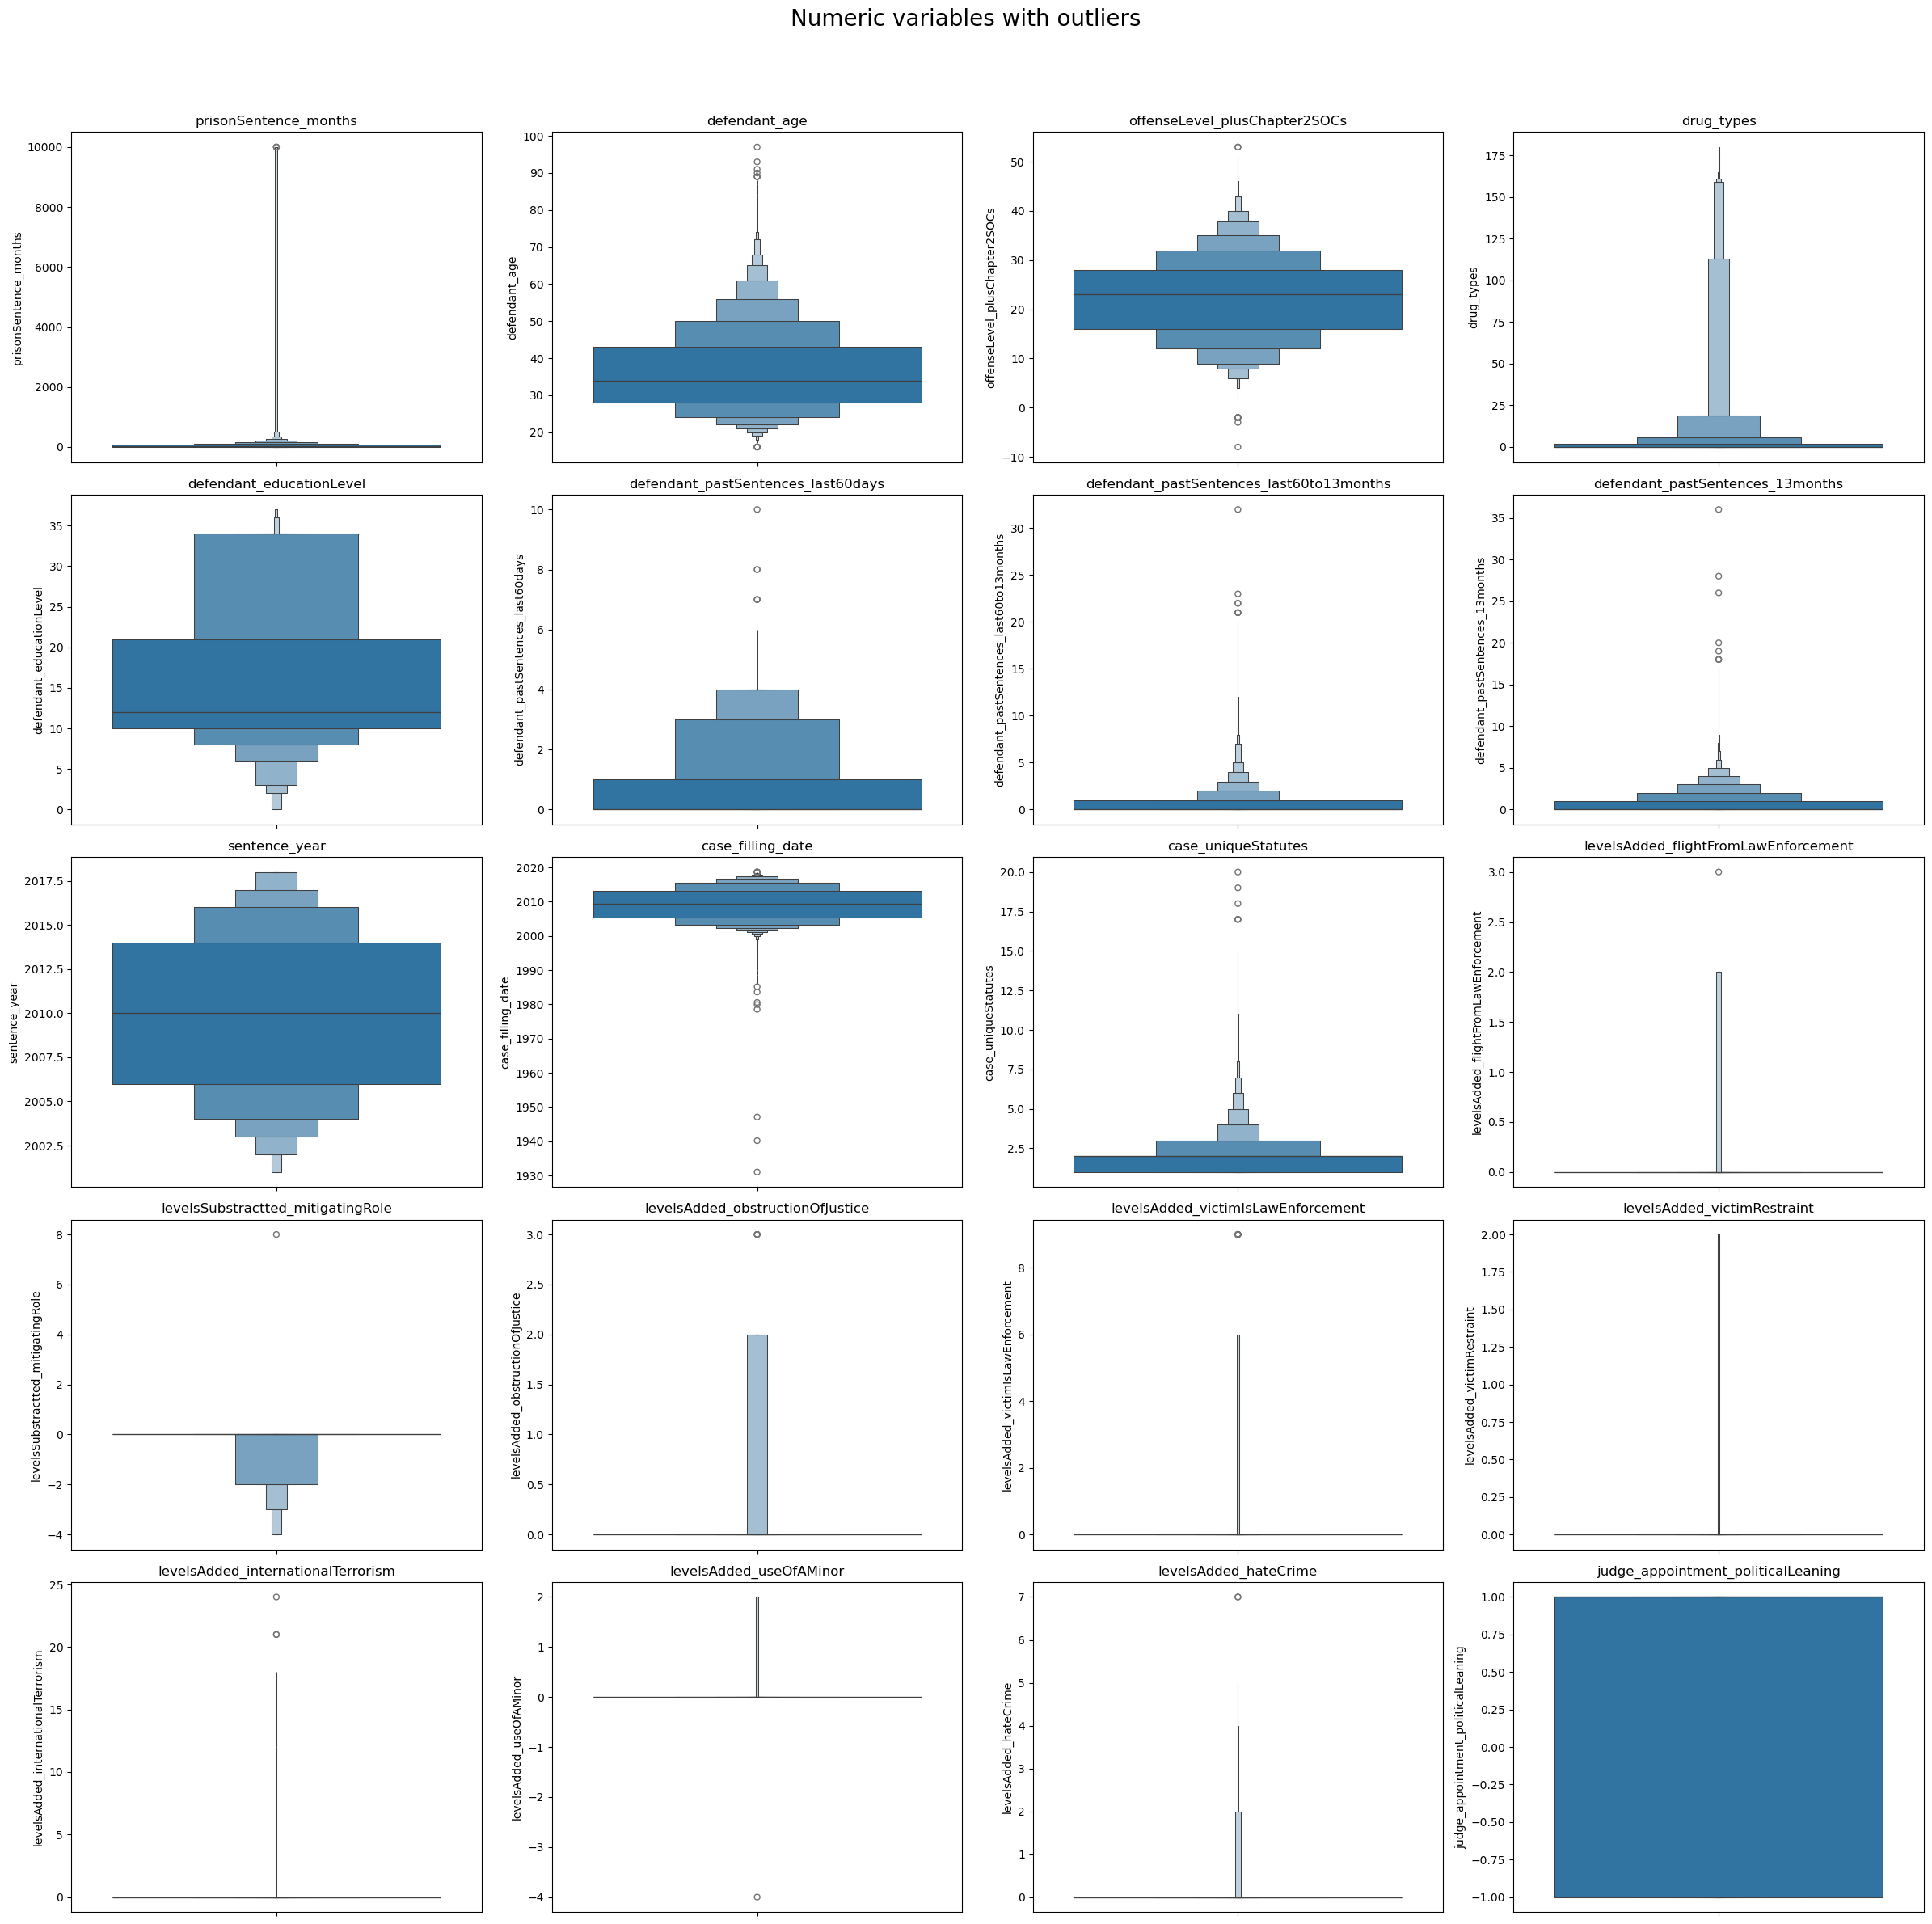

In [19]:
# boxen plots of unfiltered numerical variables
n_cols = 4
n_rows = int(np.ceil(len(num_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    print(i, col)
    sns.boxenplot(y=prison_sentences[col], ax=axes[i])
    axes[i].set_title(col)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
fig.suptitle("Numeric variables with outliers", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

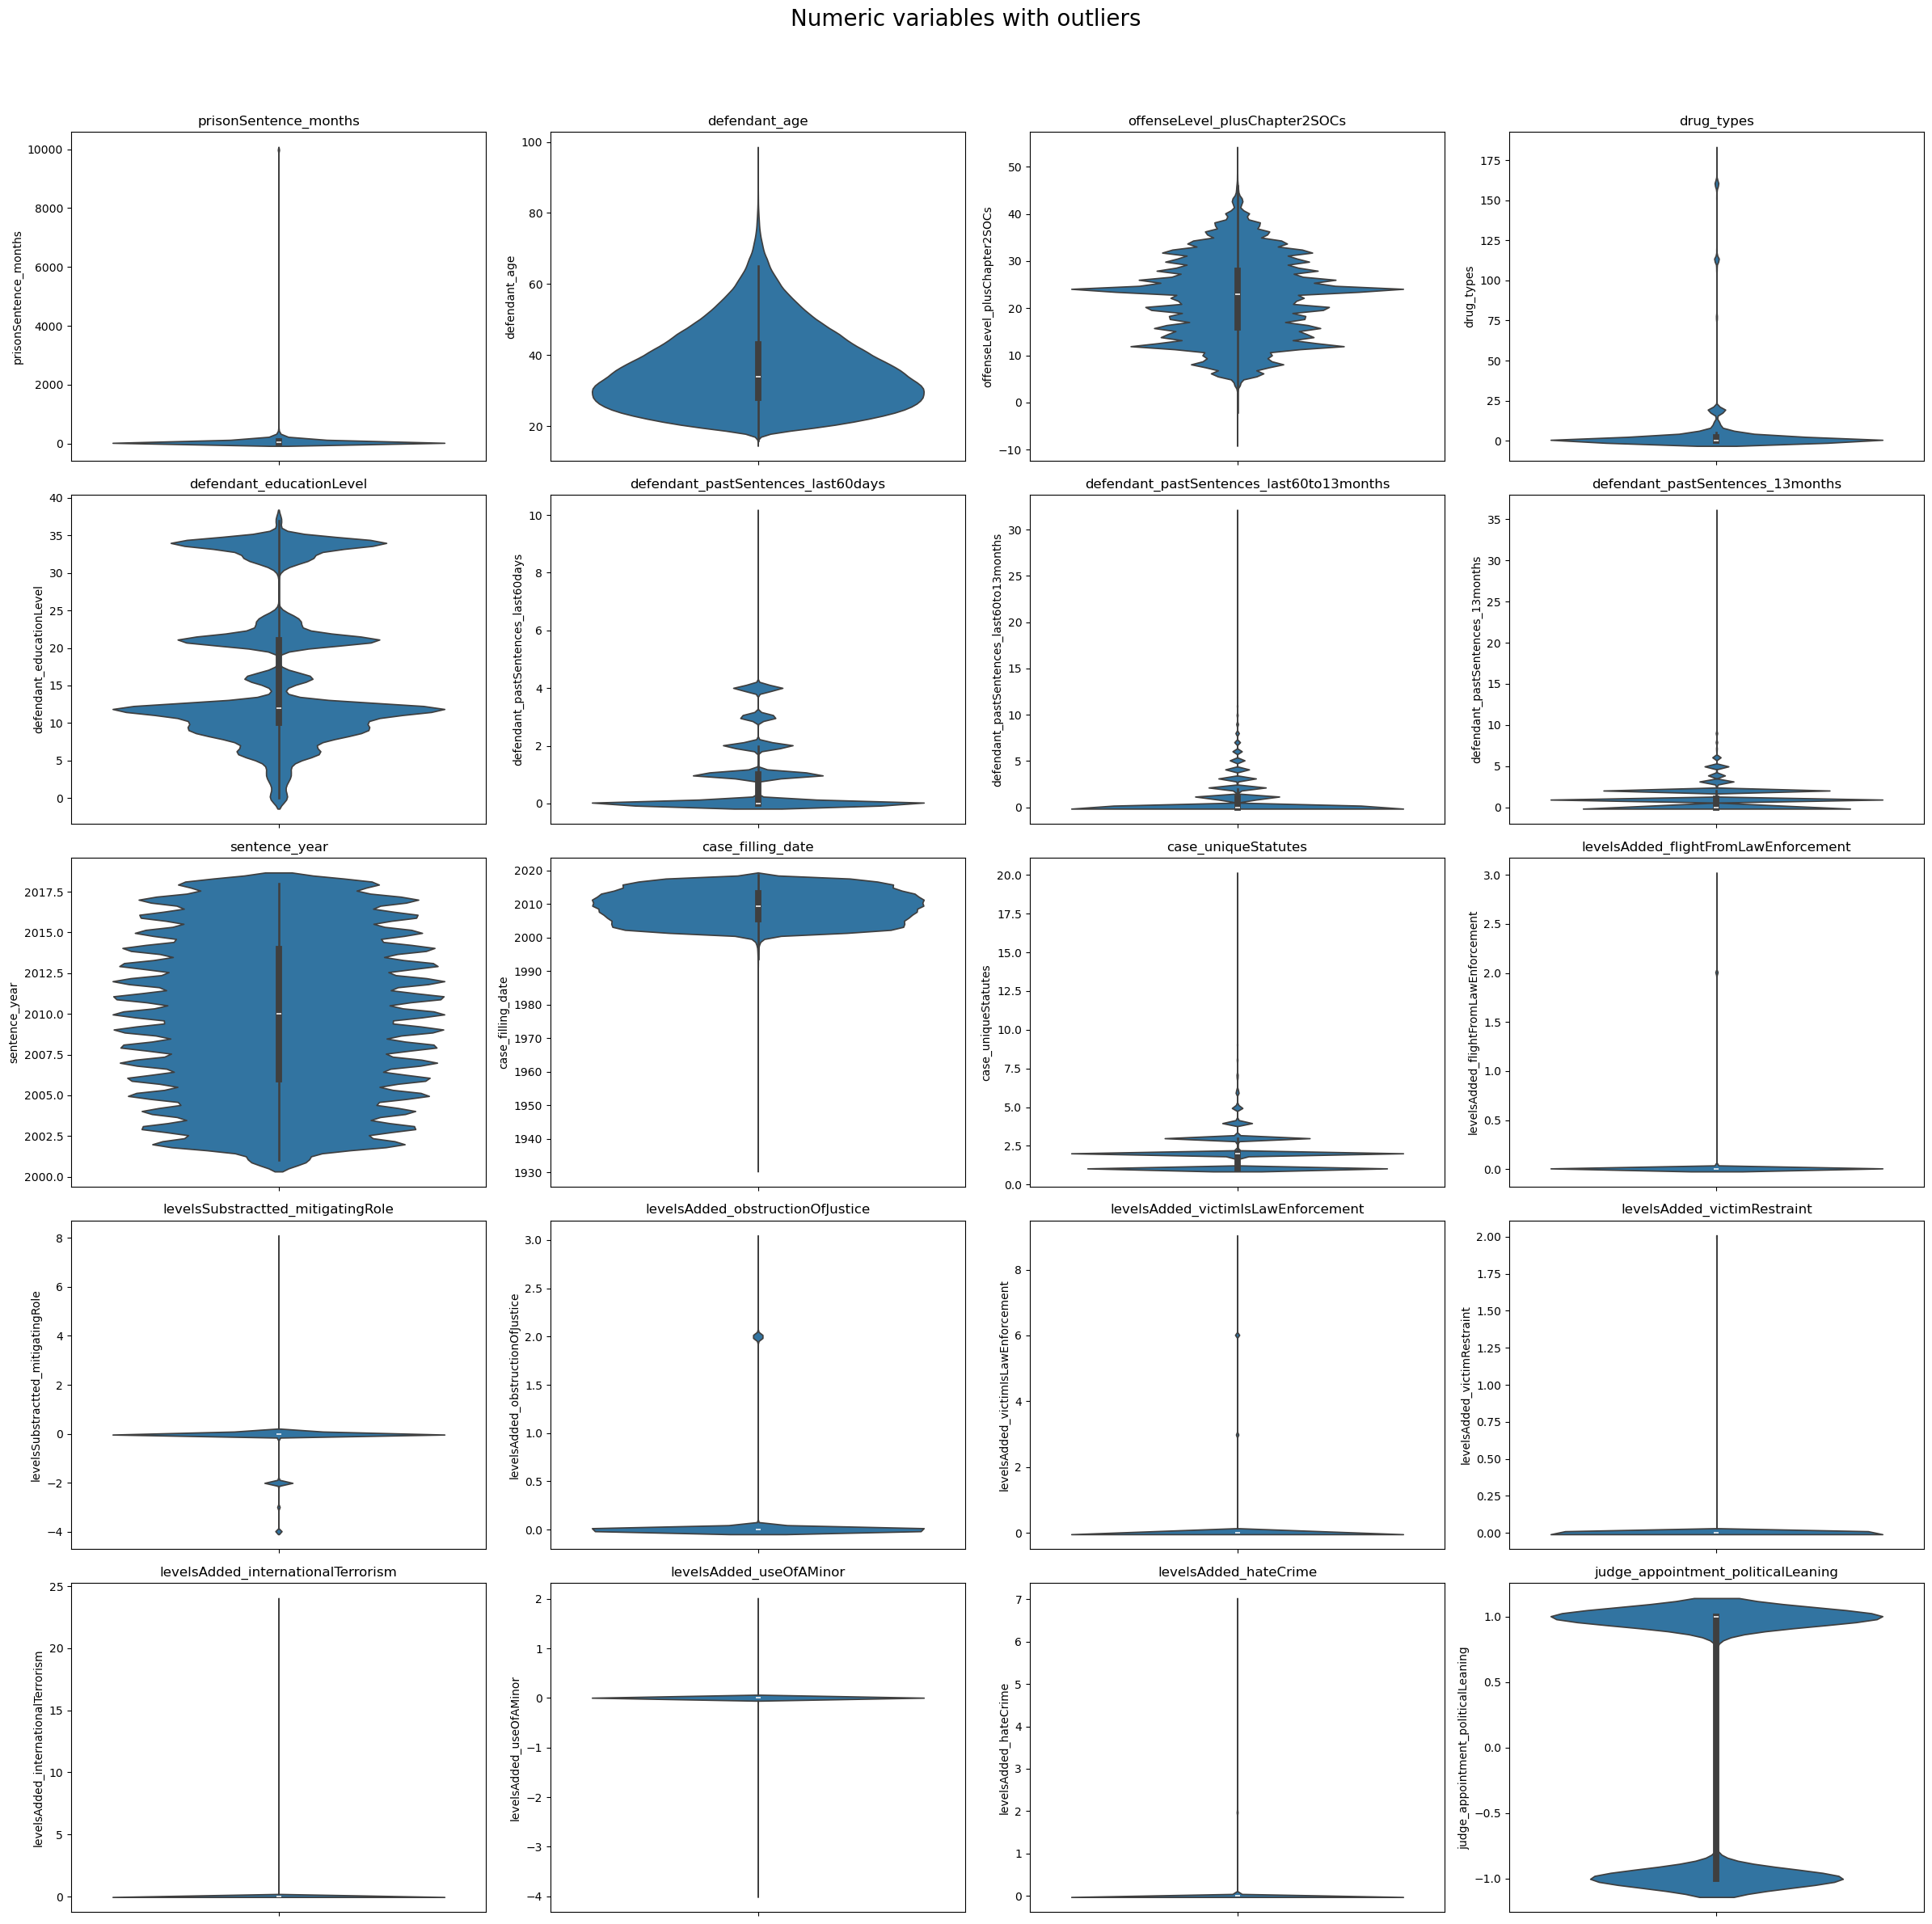

In [20]:
# violin plots of unfiltered numerical variables
n_cols = 4
n_rows = int(np.ceil(len(num_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.violinplot(y=prison_sentences[col], ax=axes[i])
    axes[i].set_title(col)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
fig.suptitle("Numeric variables with outliers", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [21]:
# deleting terrible outliers
outlier_thresholds = {
    'prisonSentence_months': {
        'lower': 0,
        'upper': 1200
    },
    'case_filling_date': {
        'lower': pd.Timestamp('1990-01-01'),
        'upper': pd.Timestamp('2100-12-31')
    },
    'sentence_year': {
        'lower': 2002,
        'upper': 2017
    },
}

In [22]:
for col, thresholds in outlier_thresholds.items():
    prison_sentences = prison_sentences[
        (prison_sentences[col] >= thresholds['lower']) & 
        (prison_sentences[col] <= thresholds['upper'])
    ]

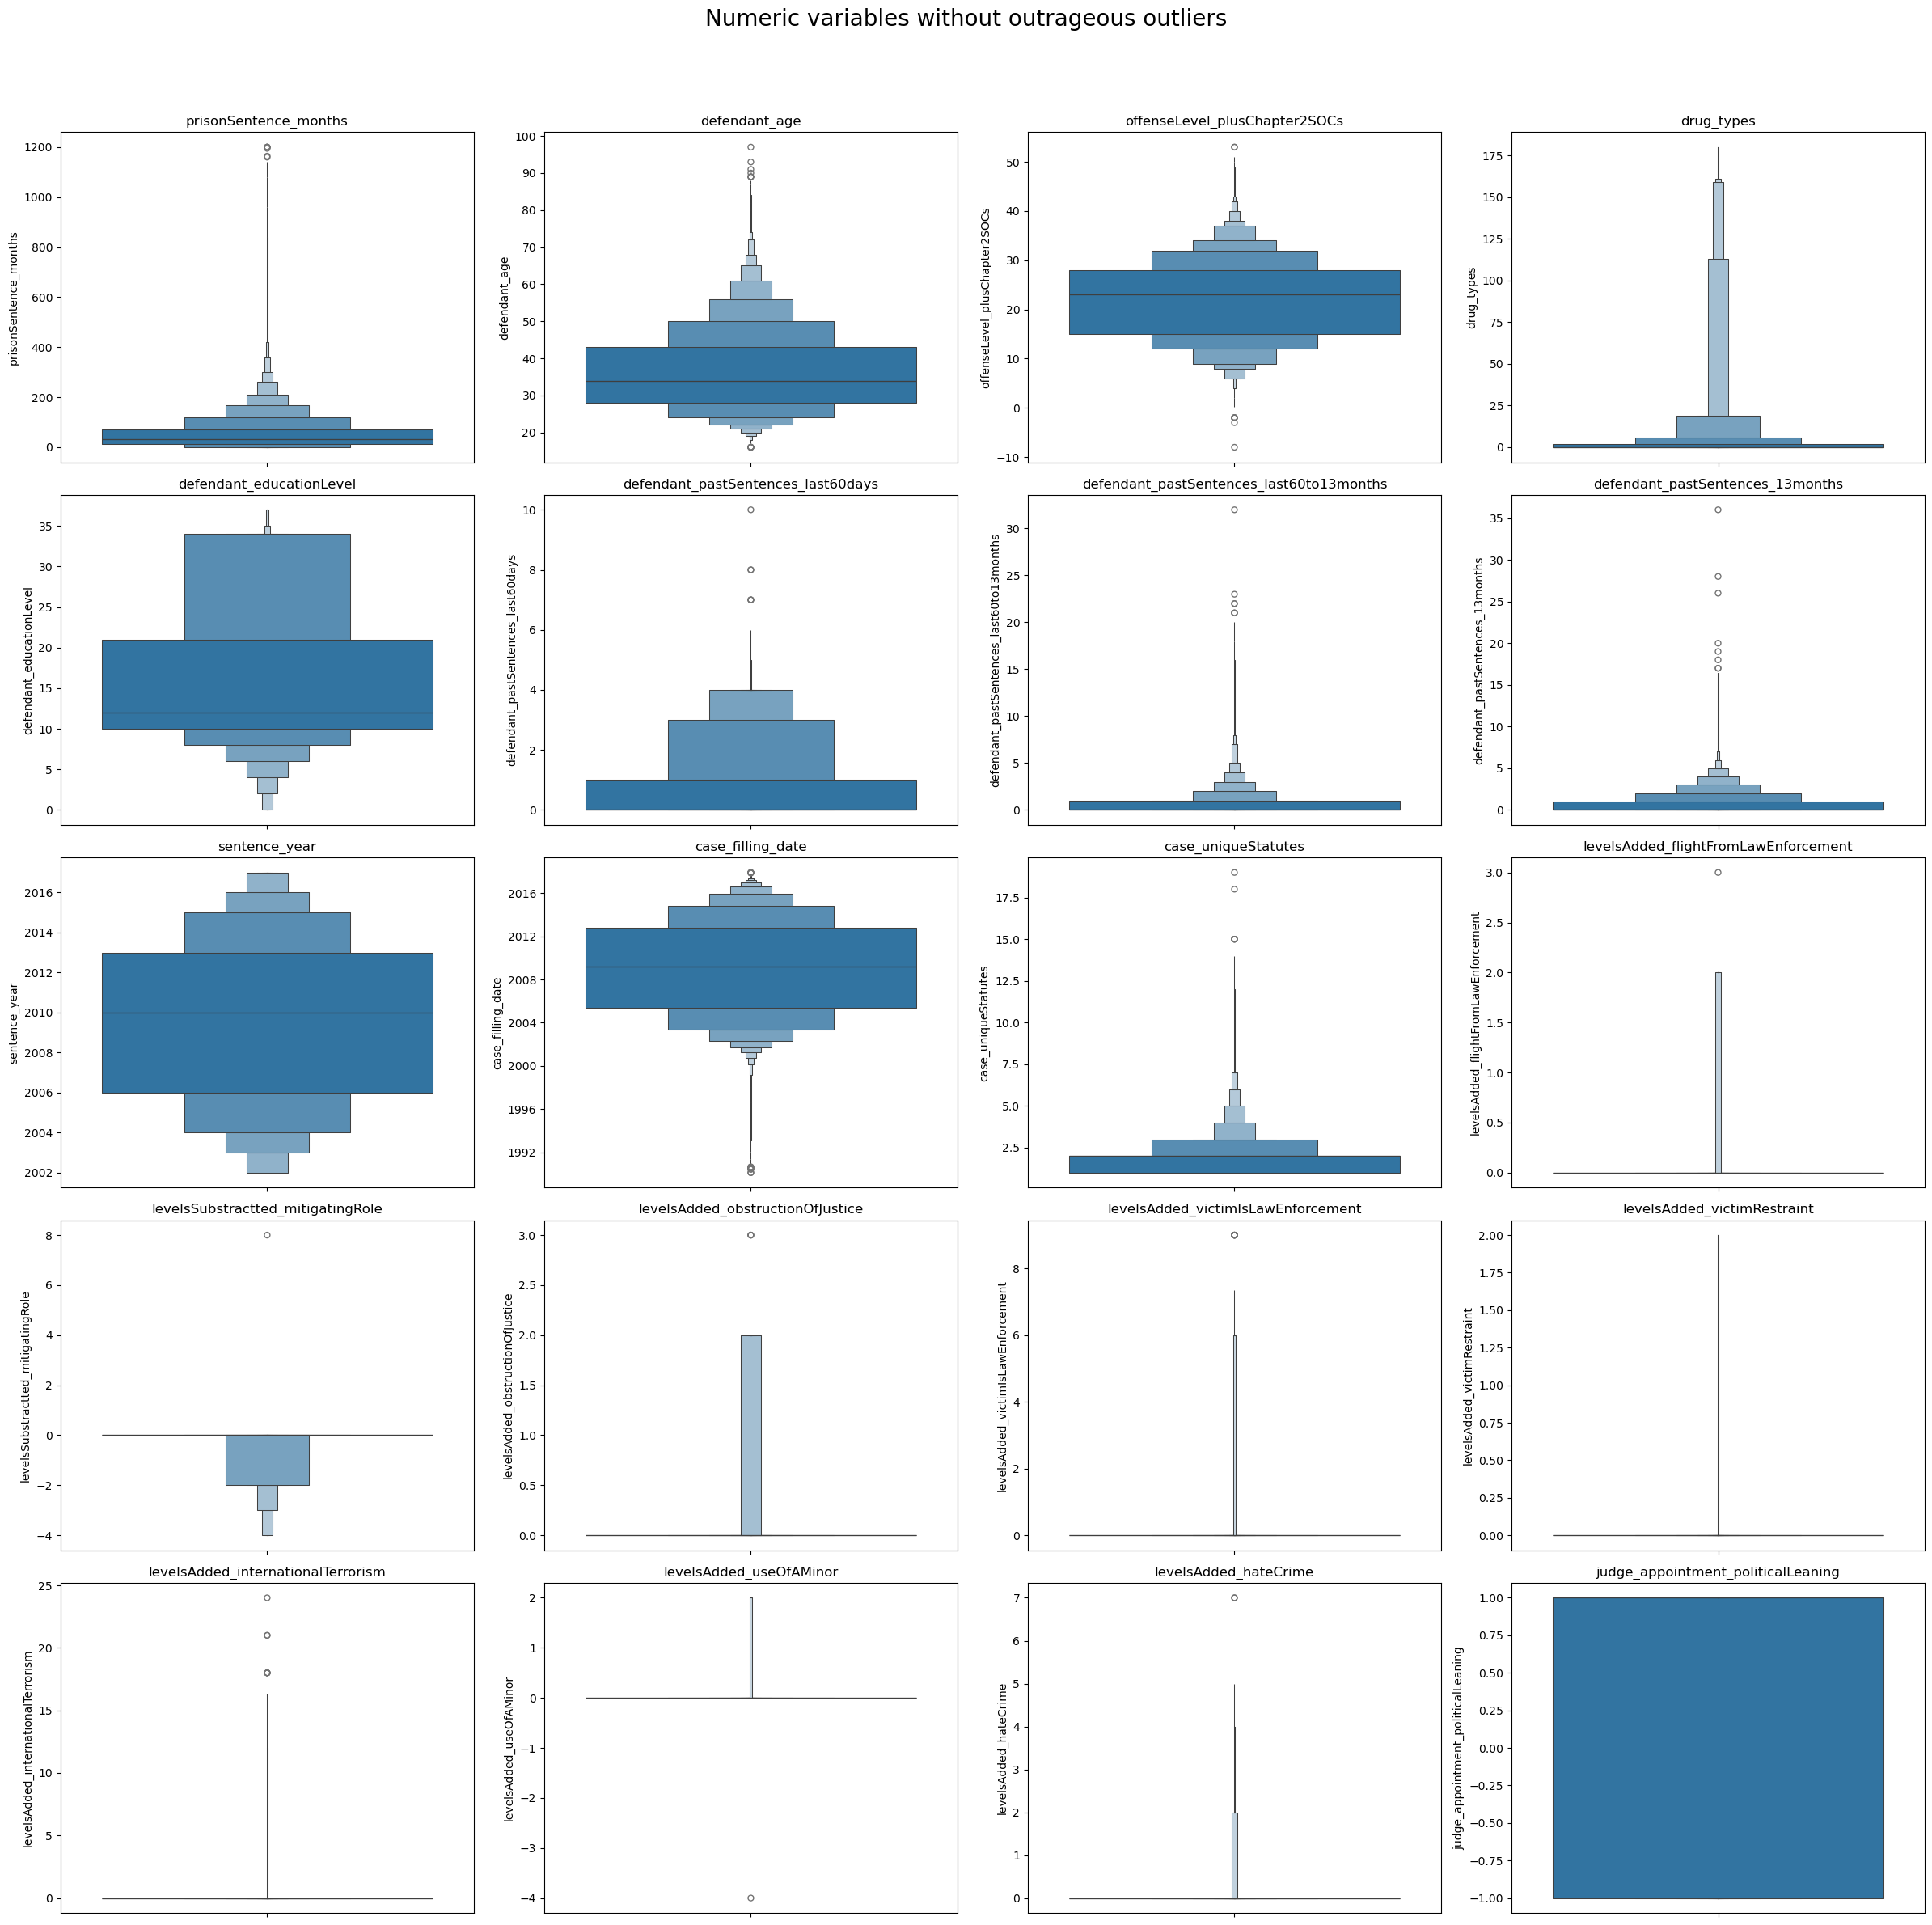

In [23]:
# boxen plots of filtered numerical variables
n_cols = 4
n_rows = int(np.ceil(len(num_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxenplot(y=prison_sentences[col], ax=axes[i])
    axes[i].set_title(col)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
fig.suptitle("Numeric variables without outrageous outliers", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [24]:
def merge_small_categories(series, max_categories=4, other_label='others'):
    """
    If the number of unique values in the series is greater than max_categories,
    keep the top (max_categories-1) most frequent and group the rest as 'others'.
    """
    value_counts = series.value_counts(dropna=False)
    if len(value_counts) > max_categories:
        top_categories = value_counts.index[:max_categories-1]
        return series.apply(lambda x: x if x in top_categories else other_label)
    else:
        return series

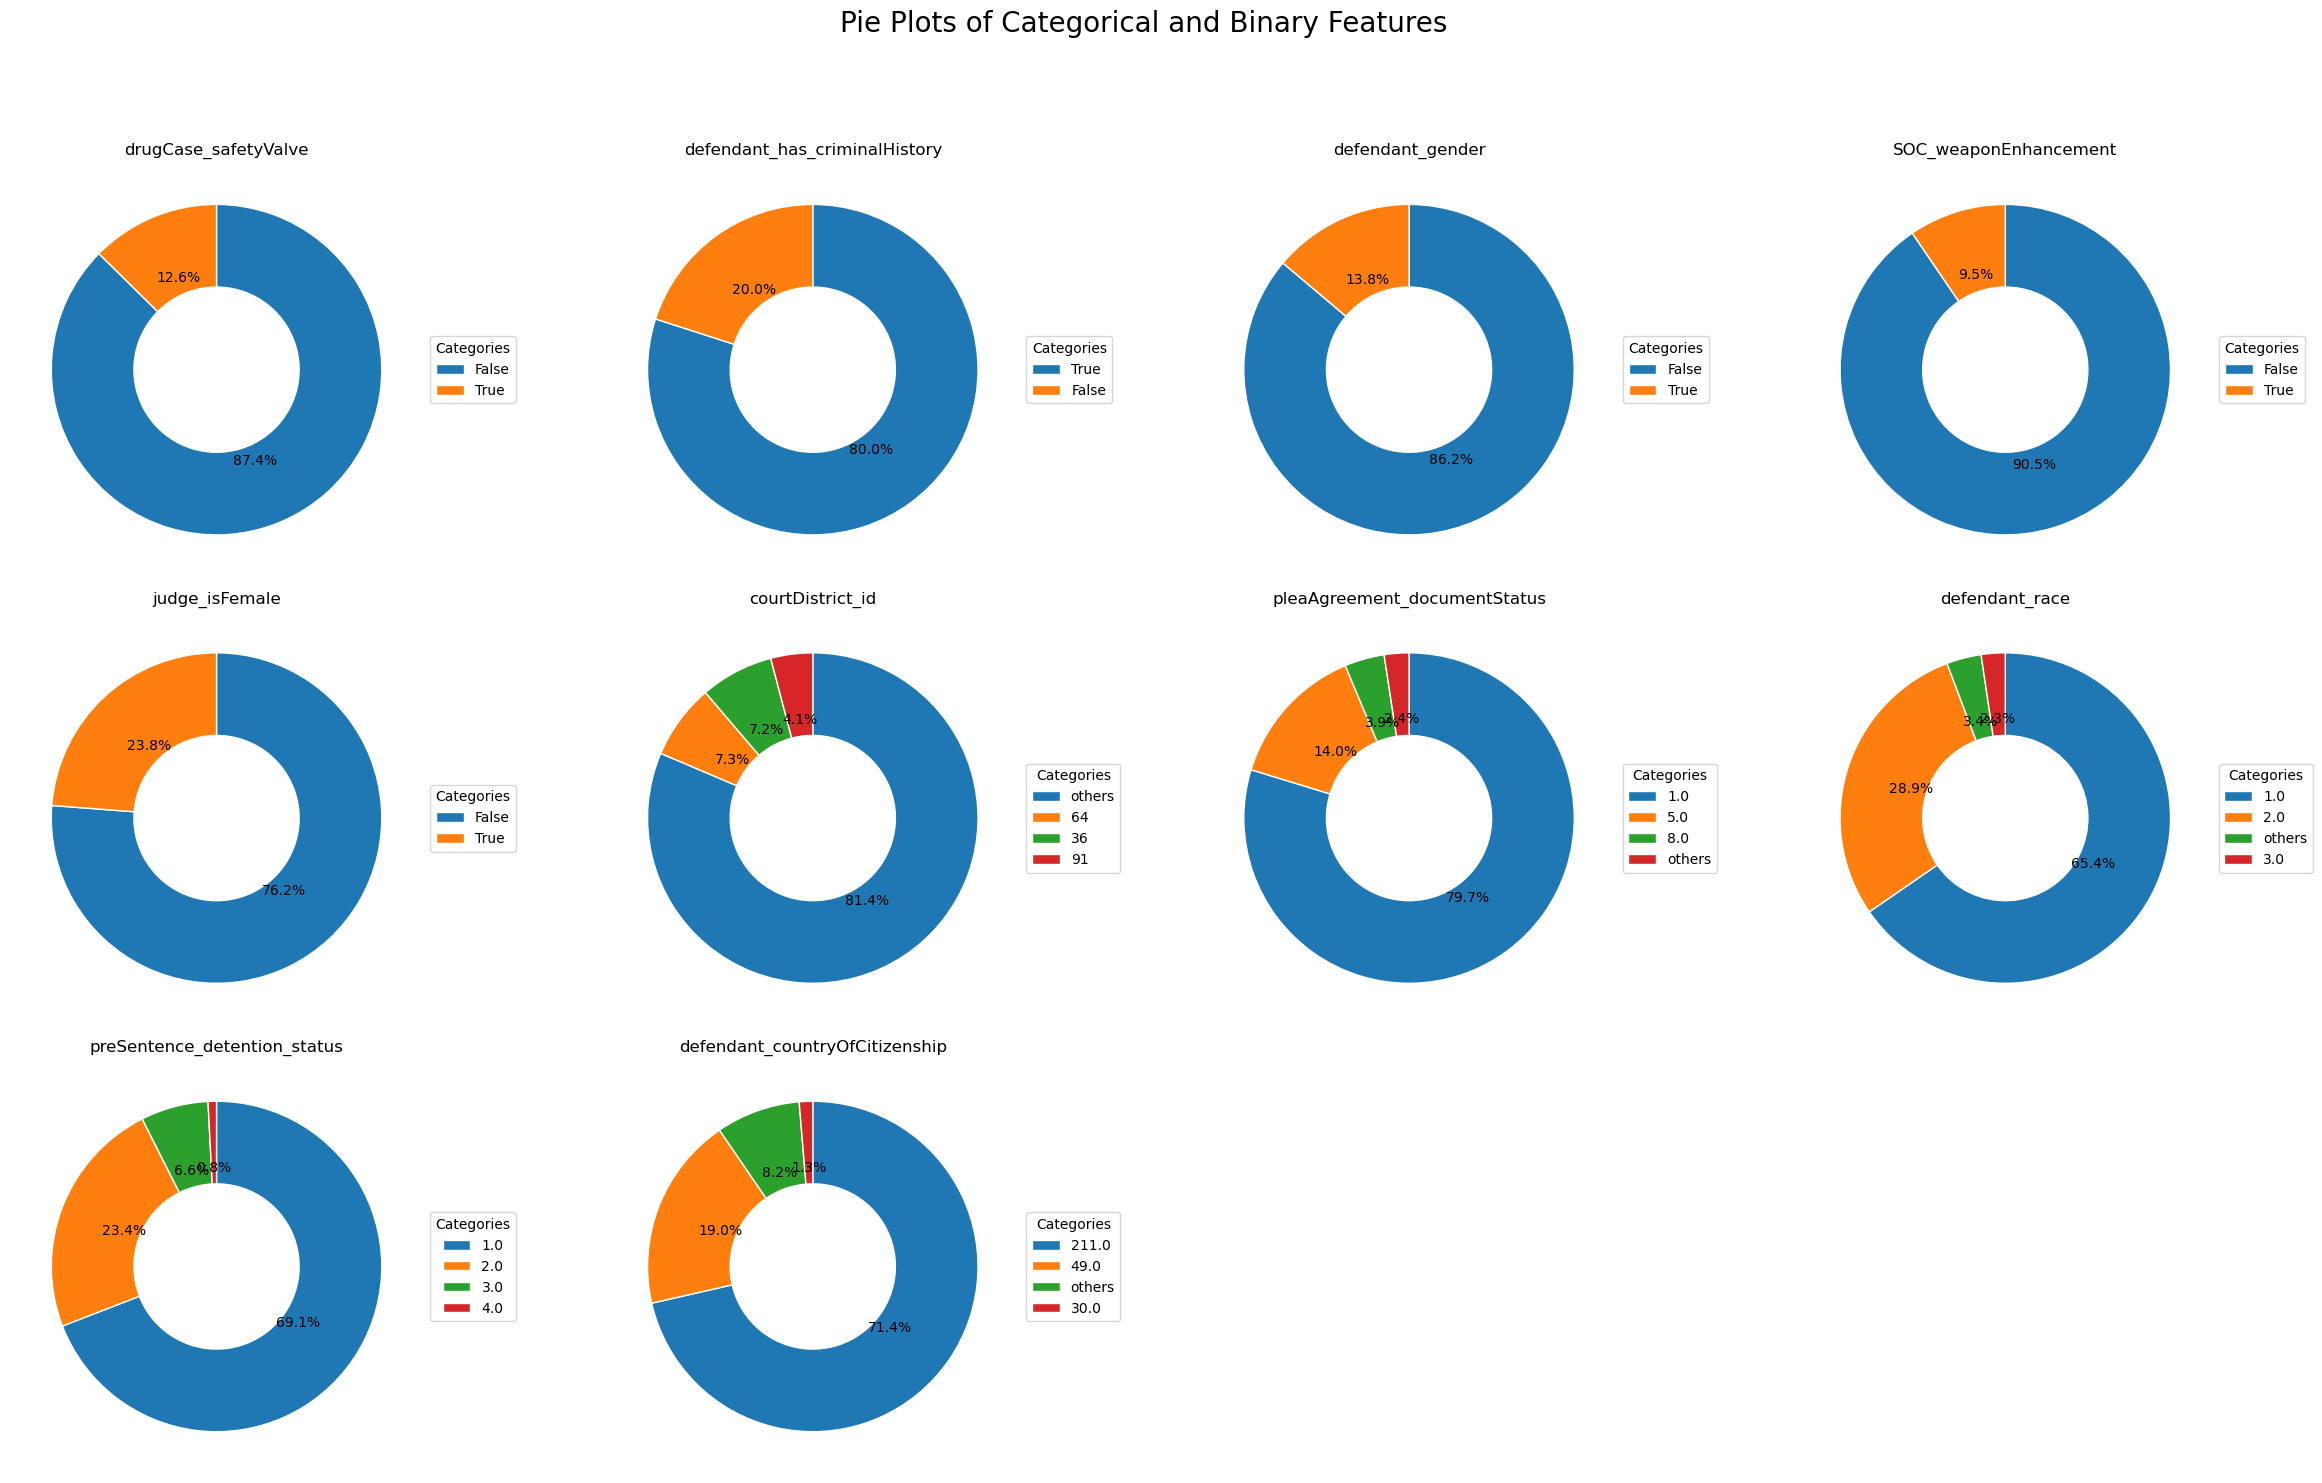

In [25]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(binary_features + categorical_features):
    merged_col = merge_small_categories(prison_sentences[col])
    data = merged_col.value_counts(dropna=False)
    labels = data.index.astype(str)
    # If binary, replace 1/0 with True/False in legend
    if col in binary_features:
        labels = ['True' if np.float64(x) == 1.0 else 'False' if np.float64(x) == 0 else str(x) for x in labels]
    wedges, texts, autotexts = axes[i].pie(
        data,
        labels=None,  # Remove direct labels from pie
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        wedgeprops=dict(width=0.5, edgecolor='w')
    )
    # Add legend outside the pie
    axes[i].legend(
        wedges, labels,
        title="Categories",
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        fontsize=10
    )
    axes[i].set_title(col, fontsize=12)

# Remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Pie Plots of Categorical and Binary Features', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# written by GPT-4.1 in Copilot with the following initial prompt:
# "Create a grid of pie plots for categorical and binary features. 
# Merge the lowest counts into 'others' if there are more than 4 categories. 
# Use the prison_sentences df."
# later edited both manually and by an LLM

## Correlation matrices

### Numeric features

Text(0.5, 1.0, 'Correlation Matrix of All Numeric Features')

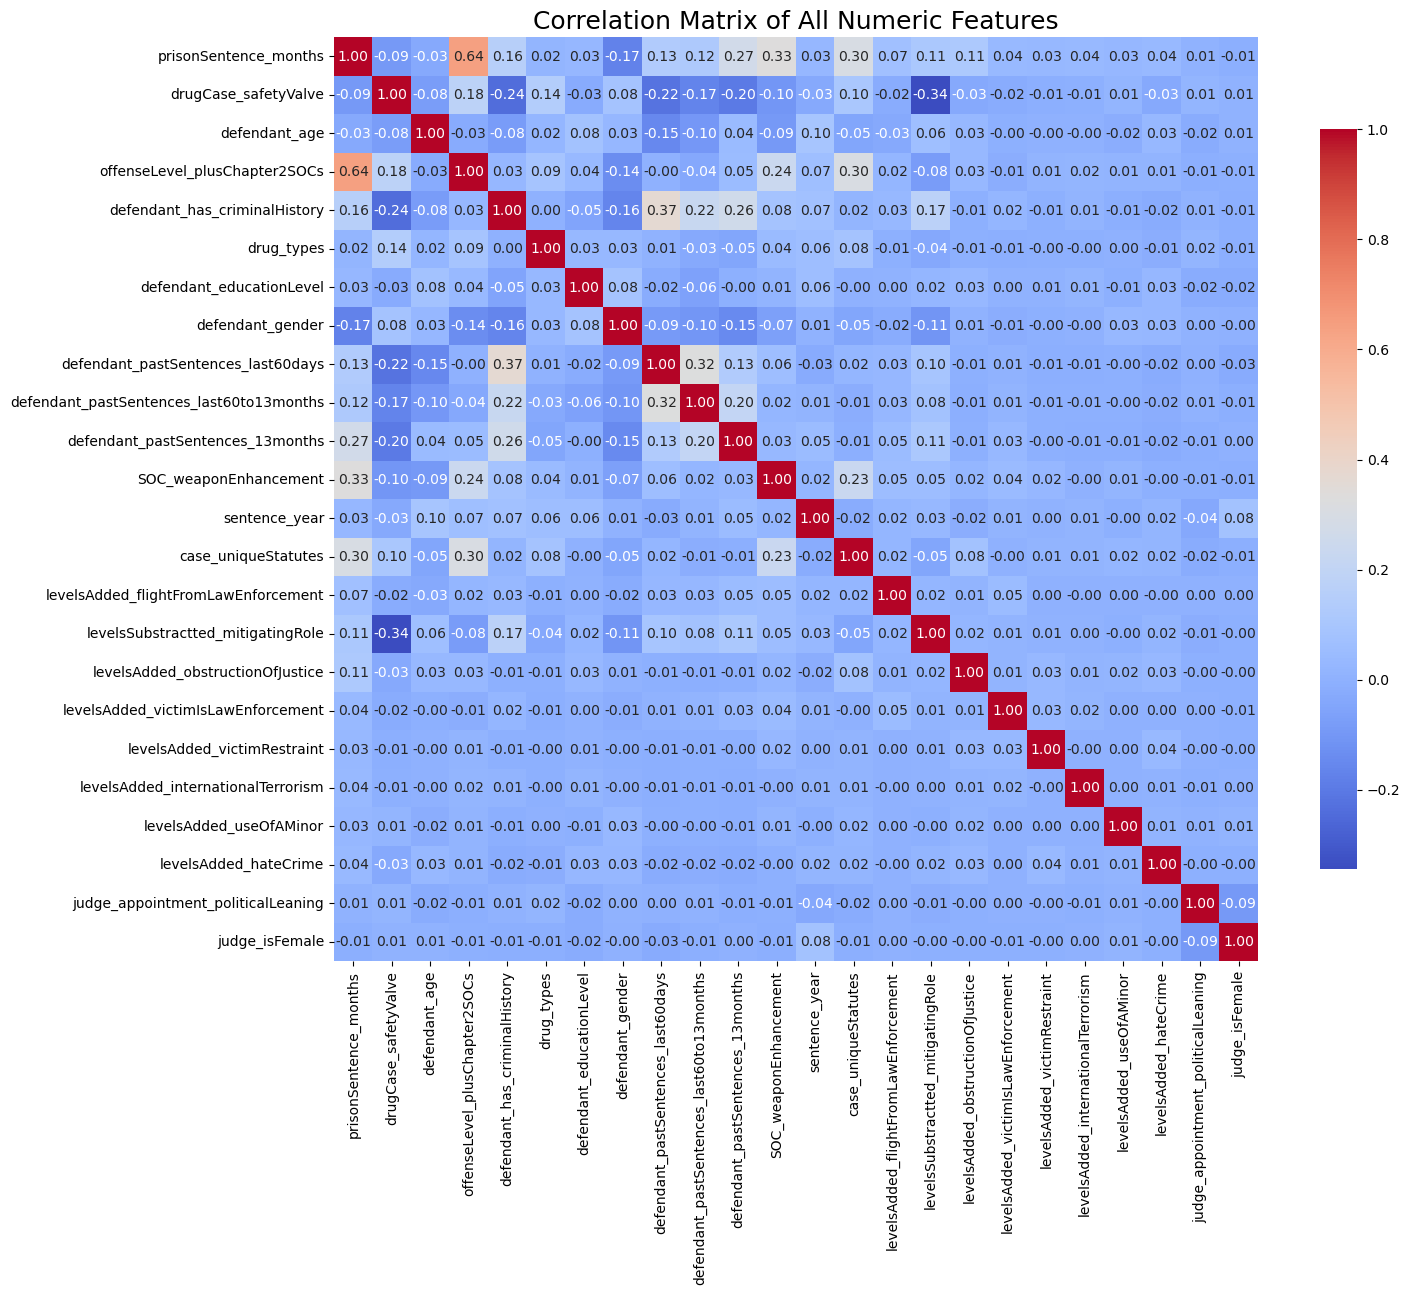

In [26]:
plt.figure(figsize=(16, 12))
corr = prison_sentences.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of All Numeric Features", fontsize=18)

This correlation matrix shows little correlation between numeric features and a healthy amount of correlation to the target.

### Correlation to categorical variables

In [27]:
# Calculate and print correlation between prisonSentence_months and dummies for each categorical feature

dummies_highlyCorrelated = []
for col in categorical_features:
    dummies = pd.get_dummies(prison_sentences[col], prefix=col, drop_first=False)
    for dummy_col in dummies.columns:
        corr = prison_sentences['prisonSentence_months'].corr(dummies[dummy_col])
        if abs(corr) >= 0.05:
            print(f"Correlation between prisonSentence_months and {dummy_col}: {corr:.4f}")
            dummies_highlyCorrelated.append(dummy_col)

# written by GPT-4.1 in Copilot with the following initial prompt:
# "Calculate the correlation between prisonSentence_months and temporal dummy 
# variables of each of the elements in the categorical_features list and print them on the console"

Correlation between prisonSentence_months and courtDistrict_id_24: 0.0517
Correlation between prisonSentence_months and courtDistrict_id_36: -0.0627
Correlation between prisonSentence_months and courtDistrict_id_43: 0.0503


c:\Users\ragal\.conda\envs\up_ml\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\ragal\.conda\envs\up_ml\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Correlation between prisonSentence_months and courtDistrict_id_64: -0.0961
Correlation between prisonSentence_months and courtDistrict_id_68: -0.0532
Correlation between prisonSentence_months and pleaAgreement_documentStatus_1.0: -0.0625
Correlation between prisonSentence_months and pleaAgreement_documentStatus_8.0: 0.2220
Correlation between prisonSentence_months and defendant_race_1.0: -0.1364
Correlation between prisonSentence_months and defendant_race_2.0: 0.1632
Correlation between prisonSentence_months and preSentence_detention_status_1.0: 0.3041
Correlation between prisonSentence_months and preSentence_detention_status_2.0: -0.2404
Correlation between prisonSentence_months and preSentence_detention_status_3.0: -0.1430
Correlation between prisonSentence_months and defendant_countryOfCitizenship_49.0: -0.1140
Correlation between prisonSentence_months and defendant_countryOfCitizenship_211.0: 0.1318


__There appears to be sustantially larger prison sentences for people of two specific countries, two races and in a couple of specific courts and districts, among others.__

In [28]:
for col in binary_features:
    corr = prison_sentences['prisonSentence_months'].corr(prison_sentences[col])
    print(f"Correlation between prisonSentence_months and {col}: {corr:.4f}")

Correlation between prisonSentence_months and drugCase_safetyValve: -0.0930
Correlation between prisonSentence_months and defendant_has_criminalHistory: 0.1582
Correlation between prisonSentence_months and defendant_gender: -0.1748
Correlation between prisonSentence_months and SOC_weaponEnhancement: 0.3308
Correlation between prisonSentence_months and judge_isFemale: -0.0093


__Modified weapons seem to be very important when it comes to longer sentences.__

__Judge gender may be completely irrelevant, but the one of the defendant is definitely not.__

## Adding dummies and selecting features

#### All dummies

In [29]:
prison_sentences_with_dummies = pd.get_dummies(prison_sentences, columns=categorical_features, drop_first=False, dtype=np.float64)
print(f"Shape with dummies: {prison_sentences_with_dummies.shape}")
print(prison_sentences_with_dummies.columns)

Shape with dummies: (494469, 313)
Index(['prisonSentence_months', 'drugCase_safetyValve', 'defendant_age',
       'offenseLevel_plusChapter2SOCs', 'defendant_has_criminalHistory',
       'drug_types', 'defendant_educationLevel', 'defendant_gender',
       'defendant_pastSentences_last60days',
       'defendant_pastSentences_last60to13months',
       ...
       'defendant_countryOfCitizenship_213.0',
       'defendant_countryOfCitizenship_214.0',
       'defendant_countryOfCitizenship_215.0',
       'defendant_countryOfCitizenship_216.0',
       'defendant_countryOfCitizenship_217.0',
       'defendant_countryOfCitizenship_218.0',
       'defendant_countryOfCitizenship_219.0',
       'defendant_countryOfCitizenship_220.0',
       'defendant_countryOfCitizenship_221.0',
       'defendant_countryOfCitizenship_222.0'],
      dtype='object', length=313)


#### Only highly correlated dummies

In [30]:
prison_sentences_onlyHighlyCorrelatedDummies = prison_sentences.copy()
prison_sentences_onlyHighlyCorrelatedDummies.drop(columns=categorical_features, inplace=True)
for col in dummies_highlyCorrelated:
    prison_sentences_onlyHighlyCorrelatedDummies[col] = prison_sentences_with_dummies[col]

#### Only highly correlated features

In [31]:
prison_sentences_onlyHighlyCorrelatedDummies.columns

Index(['prisonSentence_months', 'drugCase_safetyValve', 'defendant_age',
       'offenseLevel_plusChapter2SOCs', 'defendant_has_criminalHistory',
       'drug_types', 'defendant_educationLevel', 'defendant_gender',
       'defendant_pastSentences_last60days',
       'defendant_pastSentences_last60to13months',
       'defendant_pastSentences_13months', 'SOC_weaponEnhancement',
       'sentence_year', 'case_filling_date', 'case_uniqueStatutes',
       'levelsAdded_flightFromLawEnforcement',
       'levelsSubstractted_mitigatingRole', 'levelsAdded_obstructionOfJustice',
       'levelsAdded_victimIsLawEnforcement', 'levelsAdded_victimRestraint',
       'levelsAdded_internationalTerrorism', 'levelsAdded_useOfAMinor',
       'levelsAdded_hateCrime', 'judge_appointment_politicalLeaning',
       'judge_isFemale', 'courtDistrict_id_24', 'courtDistrict_id_36',
       'courtDistrict_id_43', 'courtDistrict_id_64', 'courtDistrict_id_68',
       'pleaAgreement_documentStatus_1.0', 'pleaAgreement_doc

In [32]:
features_highlyCorrelated = []
for col in prison_sentences_onlyHighlyCorrelatedDummies.columns:
    print(col)
    corr = prison_sentences_onlyHighlyCorrelatedDummies['prisonSentence_months'].corr(prison_sentences_onlyHighlyCorrelatedDummies[col])
    if abs(corr) >= 0.05:
        print(f"Correlation between prisonSentence_months and {col}: {corr:.4f}")
        features_highlyCorrelated.append(col)

prisonSentence_months
Correlation between prisonSentence_months and prisonSentence_months: 1.0000
drugCase_safetyValve
Correlation between prisonSentence_months and drugCase_safetyValve: -0.0930
defendant_age
offenseLevel_plusChapter2SOCs
Correlation between prisonSentence_months and offenseLevel_plusChapter2SOCs: 0.6419
defendant_has_criminalHistory
Correlation between prisonSentence_months and defendant_has_criminalHistory: 0.1582
drug_types
defendant_educationLevel
defendant_gender
Correlation between prisonSentence_months and defendant_gender: -0.1748
defendant_pastSentences_last60days
Correlation between prisonSentence_months and defendant_pastSentences_last60days: 0.1309
defendant_pastSentences_last60to13months
Correlation between prisonSentence_months and defendant_pastSentences_last60to13months: 0.1221
defendant_pastSentences_13months
Correlation between prisonSentence_months and defendant_pastSentences_13months: 0.2670
SOC_weaponEnhancement
Correlation between prisonSentence_m

In [33]:
prison_sentences_onlyHighlyCorrelatedFeatures = prison_sentences_onlyHighlyCorrelatedDummies[features_highlyCorrelated]

## PCA

Analyzing PCA with different sets of features to compare how dummies and colinear features 

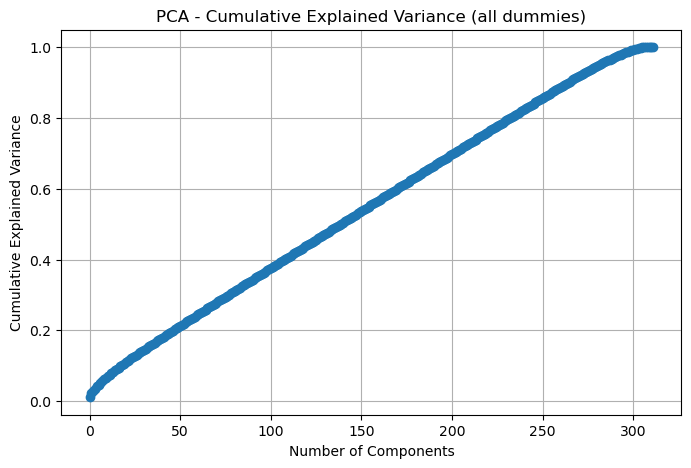

PC1: 0.0108 (Cumulative: 0.0108)
PC2: 0.0106 (Cumulative: 0.0214)
PC3: 0.0072 (Cumulative: 0.0286)
PC4: 0.0069 (Cumulative: 0.0355)
PC5: 0.0058 (Cumulative: 0.0412)
PC6: 0.0054 (Cumulative: 0.0467)
PC7: 0.0050 (Cumulative: 0.0517)
PC8: 0.0049 (Cumulative: 0.0566)
PC9: 0.0046 (Cumulative: 0.0612)
PC10: 0.0045 (Cumulative: 0.0657)


In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select only numeric columns for PCA
X = prison_sentences_with_dummies.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance (all dummies)')
plt.grid(True)
plt.show()

# Show explained variance for first 10 components
for i, var in enumerate(pca.explained_variance_ratio_[:10], 1):
    print(f"PC{i}: {var:.4f} (Cumulative: {np.sum(pca.explained_variance_ratio_[:i]):.4f})")

# written by GPT-4.1 in Copilot with the following initial prompt:
# "Do PCA with the new df"

In [35]:
# Get feature names (excluding datetime columns)
feature_names = X.columns

# For the first 3 principal components, print the 10 largest absolute weights and their feature names
for pc_idx in range(3):
    pc_weights = pca.components_[pc_idx]
    abs_weights = np.abs(pc_weights)
    top_indices = abs_weights.argsort()[-10:][::-1]
    print(f"\nTop 10 weights for PC{pc_idx+1}:")
    for idx in top_indices:
        print(f"{feature_names[idx]}: {pc_weights[idx]:.4f}")

# written by GPT-4.1 in Copilot with the following initial prompt:
# "Print the 10 largest weights for the first 3 principal components and their feature names"


Top 10 weights for PC1:
defendant_countryOfCitizenship_211.0: 0.4221
defendant_countryOfCitizenship_49.0: -0.4056
defendant_race_1.0: -0.3644
defendant_race_2.0: 0.3599
defendant_educationLevel: 0.2143
prisonSentence_months: 0.1796
courtDistrict_id_64: -0.1768
courtDistrict_id_36: -0.1680
preSentence_detention_status_1.0: -0.1484
SOC_weaponEnhancement: 0.1439

Top 10 weights for PC2:
preSentence_detention_status_1.0: 0.4338
preSentence_detention_status_2.0: -0.3631
prisonSentence_months: 0.3168
defendant_has_criminalHistory: 0.2727
defendant_pastSentences_13months: 0.2465
defendant_pastSentences_last60to13months: 0.2240
defendant_gender: -0.2211
defendant_pastSentences_last60days: 0.2204
offenseLevel_plusChapter2SOCs: 0.1891
preSentence_detention_status_3.0: -0.1723

Top 10 weights for PC3:
offenseLevel_plusChapter2SOCs: 0.4078
pleaAgreement_documentStatus_5.0: -0.4008
pleaAgreement_documentStatus_1.0: 0.3911
drugCase_safetyValve: 0.2938
case_uniqueStatutes: 0.2512
prisonSentence_mont

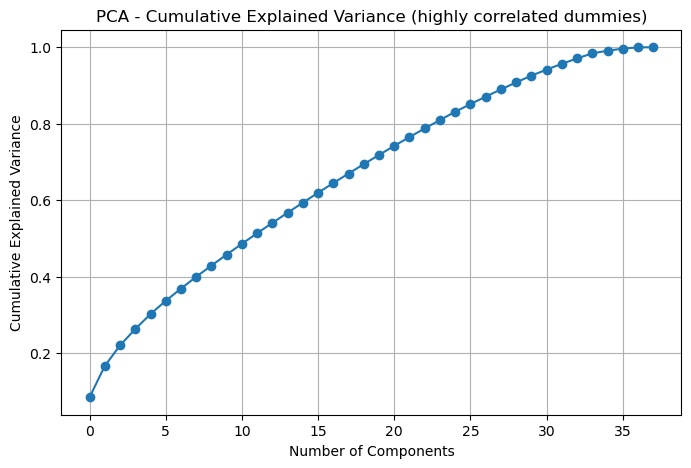

PC1: 0.0848 (Cumulative: 0.0848)
PC2: 0.0819 (Cumulative: 0.1668)
PC3: 0.0536 (Cumulative: 0.2204)
PC4: 0.0428 (Cumulative: 0.2632)
PC5: 0.0391 (Cumulative: 0.3023)
PC6: 0.0346 (Cumulative: 0.3369)
PC7: 0.0320 (Cumulative: 0.3689)
PC8: 0.0309 (Cumulative: 0.3999)
PC9: 0.0293 (Cumulative: 0.4291)
PC10: 0.0287 (Cumulative: 0.4579)


In [36]:
# Select only numeric columns for PCA
X = prison_sentences_onlyHighlyCorrelatedDummies.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance (highly correlated dummies)')
plt.grid(True)
plt.show()

# Show explained variance for first 10 components
for i, var in enumerate(pca.explained_variance_ratio_[:10], 1):
    print(f"PC{i}: {var:.4f} (Cumulative: {np.sum(pca.explained_variance_ratio_[:i]):.4f})")

# written by GPT-4.1 in Copilot
# recovered from before

In [37]:
# Get feature names (excluding datetime columns)
feature_names = X.columns

# For the first 3 principal components, print the 10 largest absolute weights and their feature names
for pc_idx in range(3):
    pc_weights = pca.components_[pc_idx]
    abs_weights = np.abs(pc_weights)
    top_indices = abs_weights.argsort()[-10:][::-1]
    print(f"\nTop 10 weights for PC{pc_idx+1}:")
    for idx in top_indices:
        print(f"{feature_names[idx]}: {pc_weights[idx]:.4f}")

# written by GPT-4.1 in Copilot with the following initial prompt:
# "Print the 10 largest weights for the first 3 principal components and their feature names"


Top 10 weights for PC1:
prisonSentence_months: 0.3783
defendant_race_2.0: 0.2965
defendant_race_1.0: -0.2806
preSentence_detention_status_1.0: 0.2775
defendant_has_criminalHistory: 0.2727
defendant_pastSentences_13months: 0.2577
defendant_pastSentences_last60days: 0.2481
offenseLevel_plusChapter2SOCs: 0.2312
preSentence_detention_status_2.0: -0.2287
SOC_weaponEnhancement: 0.2237

Top 10 weights for PC2:
defendant_countryOfCitizenship_49.0: 0.4384
defendant_countryOfCitizenship_211.0: -0.4196
preSentence_detention_status_1.0: 0.3925
preSentence_detention_status_2.0: -0.3337
defendant_race_1.0: 0.2610
defendant_educationLevel: -0.2596
defendant_race_2.0: -0.2501
courtDistrict_id_64: 0.1999
defendant_gender: -0.1658
preSentence_detention_status_3.0: -0.1509

Top 10 weights for PC3:
offenseLevel_plusChapter2SOCs: 0.4754
case_uniqueStatutes: 0.3612
drugCase_safetyValve: 0.3520
prisonSentence_months: 0.3171
defendant_has_criminalHistory: -0.2425
levelsSubstractted_mitigatingRole: -0.2420
de

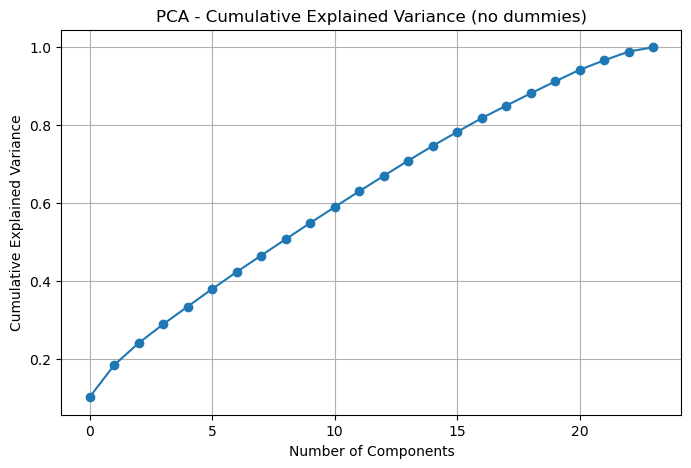

PC1: 0.1015 (Cumulative: 0.1015)
PC2: 0.0823 (Cumulative: 0.1838)
PC3: 0.0567 (Cumulative: 0.2405)
PC4: 0.0482 (Cumulative: 0.2887)
PC5: 0.0455 (Cumulative: 0.3342)
PC6: 0.0451 (Cumulative: 0.3793)
PC7: 0.0437 (Cumulative: 0.4230)
PC8: 0.0422 (Cumulative: 0.4652)
PC9: 0.0418 (Cumulative: 0.5070)
PC10: 0.0417 (Cumulative: 0.5487)


In [38]:
# Select only numeric columns for PCA
X = prison_sentences.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance (no dummies)')
plt.grid(True)
plt.show()

# Show explained variance for first 10 components
for i, var in enumerate(pca.explained_variance_ratio_[:10], 1):
    print(f"PC{i}: {var:.4f} (Cumulative: {np.sum(pca.explained_variance_ratio_[:i]):.4f})")

# written by GPT-4.1 in Copilot
# recovered from before

In [39]:
# Get feature names (excluding datetime columns)
feature_names = X.columns

# For the first 3 principal components, print the 10 largest absolute weights and their feature names
for pc_idx in range(3):
    pc_weights = pca.components_[pc_idx]
    abs_weights = np.abs(pc_weights)
    top_indices = abs_weights.argsort()[-10:][::-1]
    print(f"\nTop 10 weights for PC{pc_idx+1}:")
    for idx in top_indices:
        print(f"{feature_names[idx]}: {pc_weights[idx]:.4f}")

# written by GPT-4.1 in Copilot with the following initial prompt:
# "Print the 10 largest weights for the first 3 principal components and their feature names"


Top 10 weights for PC1:
prisonSentence_months: 0.4595
defendant_has_criminalHistory: 0.3595
defendant_pastSentences_last60days: 0.3149
defendant_pastSentences_13months: 0.3116
offenseLevel_plusChapter2SOCs: 0.2896
SOC_weaponEnhancement: 0.2804
defendant_pastSentences_last60to13months: 0.2725
defendant_gender: -0.2505
drugCase_safetyValve: -0.2460
levelsSubstractted_mitigatingRole: 0.2035

Top 10 weights for PC2:
offenseLevel_plusChapter2SOCs: 0.4911
drugCase_safetyValve: 0.3802
case_uniqueStatutes: 0.3777
prisonSentence_months: 0.3204
levelsSubstractted_mitigatingRole: -0.2576
defendant_pastSentences_last60to13months: -0.2485
defendant_has_criminalHistory: -0.2447
defendant_pastSentences_last60days: -0.2424
SOC_weaponEnhancement: 0.2287
drug_types: 0.1719

Top 10 weights for PC3:
defendant_age: 0.5384
defendant_educationLevel: 0.3383
levelsSubstractted_mitigatingRole: 0.3275
sentence_year: 0.3199
drugCase_safetyValve: -0.2866
defendant_pastSentences_last60days: -0.2848
defendant_pastS

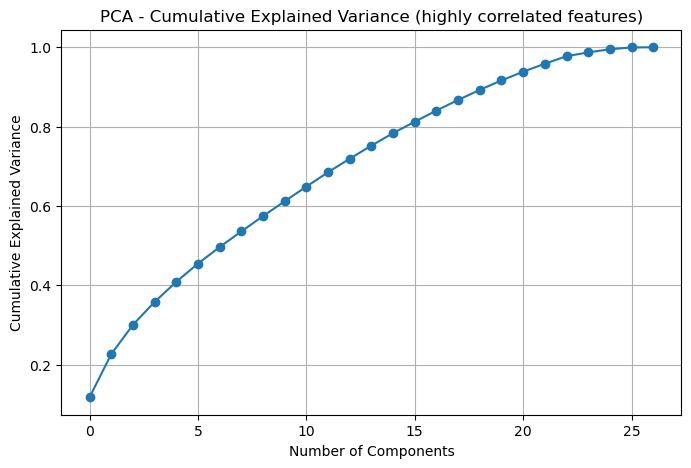

PC1: 0.1182 (Cumulative: 0.1182)
PC2: 0.1086 (Cumulative: 0.2269)
PC3: 0.0738 (Cumulative: 0.3007)
PC4: 0.0577 (Cumulative: 0.3583)
PC5: 0.0506 (Cumulative: 0.4089)
PC6: 0.0461 (Cumulative: 0.4550)
PC7: 0.0415 (Cumulative: 0.4965)
PC8: 0.0394 (Cumulative: 0.5359)
PC9: 0.0386 (Cumulative: 0.5745)
PC10: 0.0375 (Cumulative: 0.6120)


In [40]:
# Select only numeric columns for PCA
X = prison_sentences_onlyHighlyCorrelatedFeatures.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance (highly correlated features)')
plt.grid(True)
plt.show()

# Show explained variance for first 10 components
for i, var in enumerate(pca.explained_variance_ratio_[:10], 1):
    print(f"PC{i}: {var:.4f} (Cumulative: {np.sum(pca.explained_variance_ratio_[:i]):.4f})")

# written by GPT-4.1 in Copilot
# recovered from before

In [41]:
# Get feature names (excluding datetime columns)
feature_names = X.columns

# For the first 3 principal components, print the 10 largest absolute weights and their feature names
for pc_idx in range(3):
    pc_weights = pca.components_[pc_idx]
    abs_weights = np.abs(pc_weights)
    top_indices = abs_weights.argsort()[-10:][::-1]
    print(f"\nTop 10 weights for PC{pc_idx+1}:")
    for idx in top_indices:
        print(f"{feature_names[idx]}: {pc_weights[idx]:.4f}")

# written by GPT-4.1 in Copilot with the following initial prompt:
# "Print the 10 largest weights for the first 3 principal components and their feature names"


Top 10 weights for PC1:
prisonSentence_months: 0.3832
defendant_race_2.0: 0.2988
defendant_race_1.0: -0.2824
defendant_has_criminalHistory: 0.2729
preSentence_detention_status_1.0: 0.2696
defendant_pastSentences_13months: 0.2623
defendant_pastSentences_last60days: 0.2467
offenseLevel_plusChapter2SOCs: 0.2335
SOC_weaponEnhancement: 0.2239
preSentence_detention_status_2.0: -0.2223

Top 10 weights for PC2:
defendant_countryOfCitizenship_49.0: 0.4437
defendant_countryOfCitizenship_211.0: -0.4256
preSentence_detention_status_1.0: 0.4144
preSentence_detention_status_2.0: -0.3546
defendant_race_1.0: 0.2868
defendant_race_2.0: -0.2757
courtDistrict_id_64: 0.2014
defendant_gender: -0.1787
preSentence_detention_status_3.0: -0.1557
courtDistrict_id_36: 0.1307

Top 10 weights for PC3:
offenseLevel_plusChapter2SOCs: 0.4749
case_uniqueStatutes: 0.3651
drugCase_safetyValve: 0.3578
prisonSentence_months: 0.3162
defendant_has_criminalHistory: -0.2672
defendant_pastSentences_last60to13months: -0.2604
d

## Verifying selected features

We'll check there are no very highly colinear features before finishing.

Text(0.5, 1.0, 'Correlation Matrix of Highly Correlated Features')

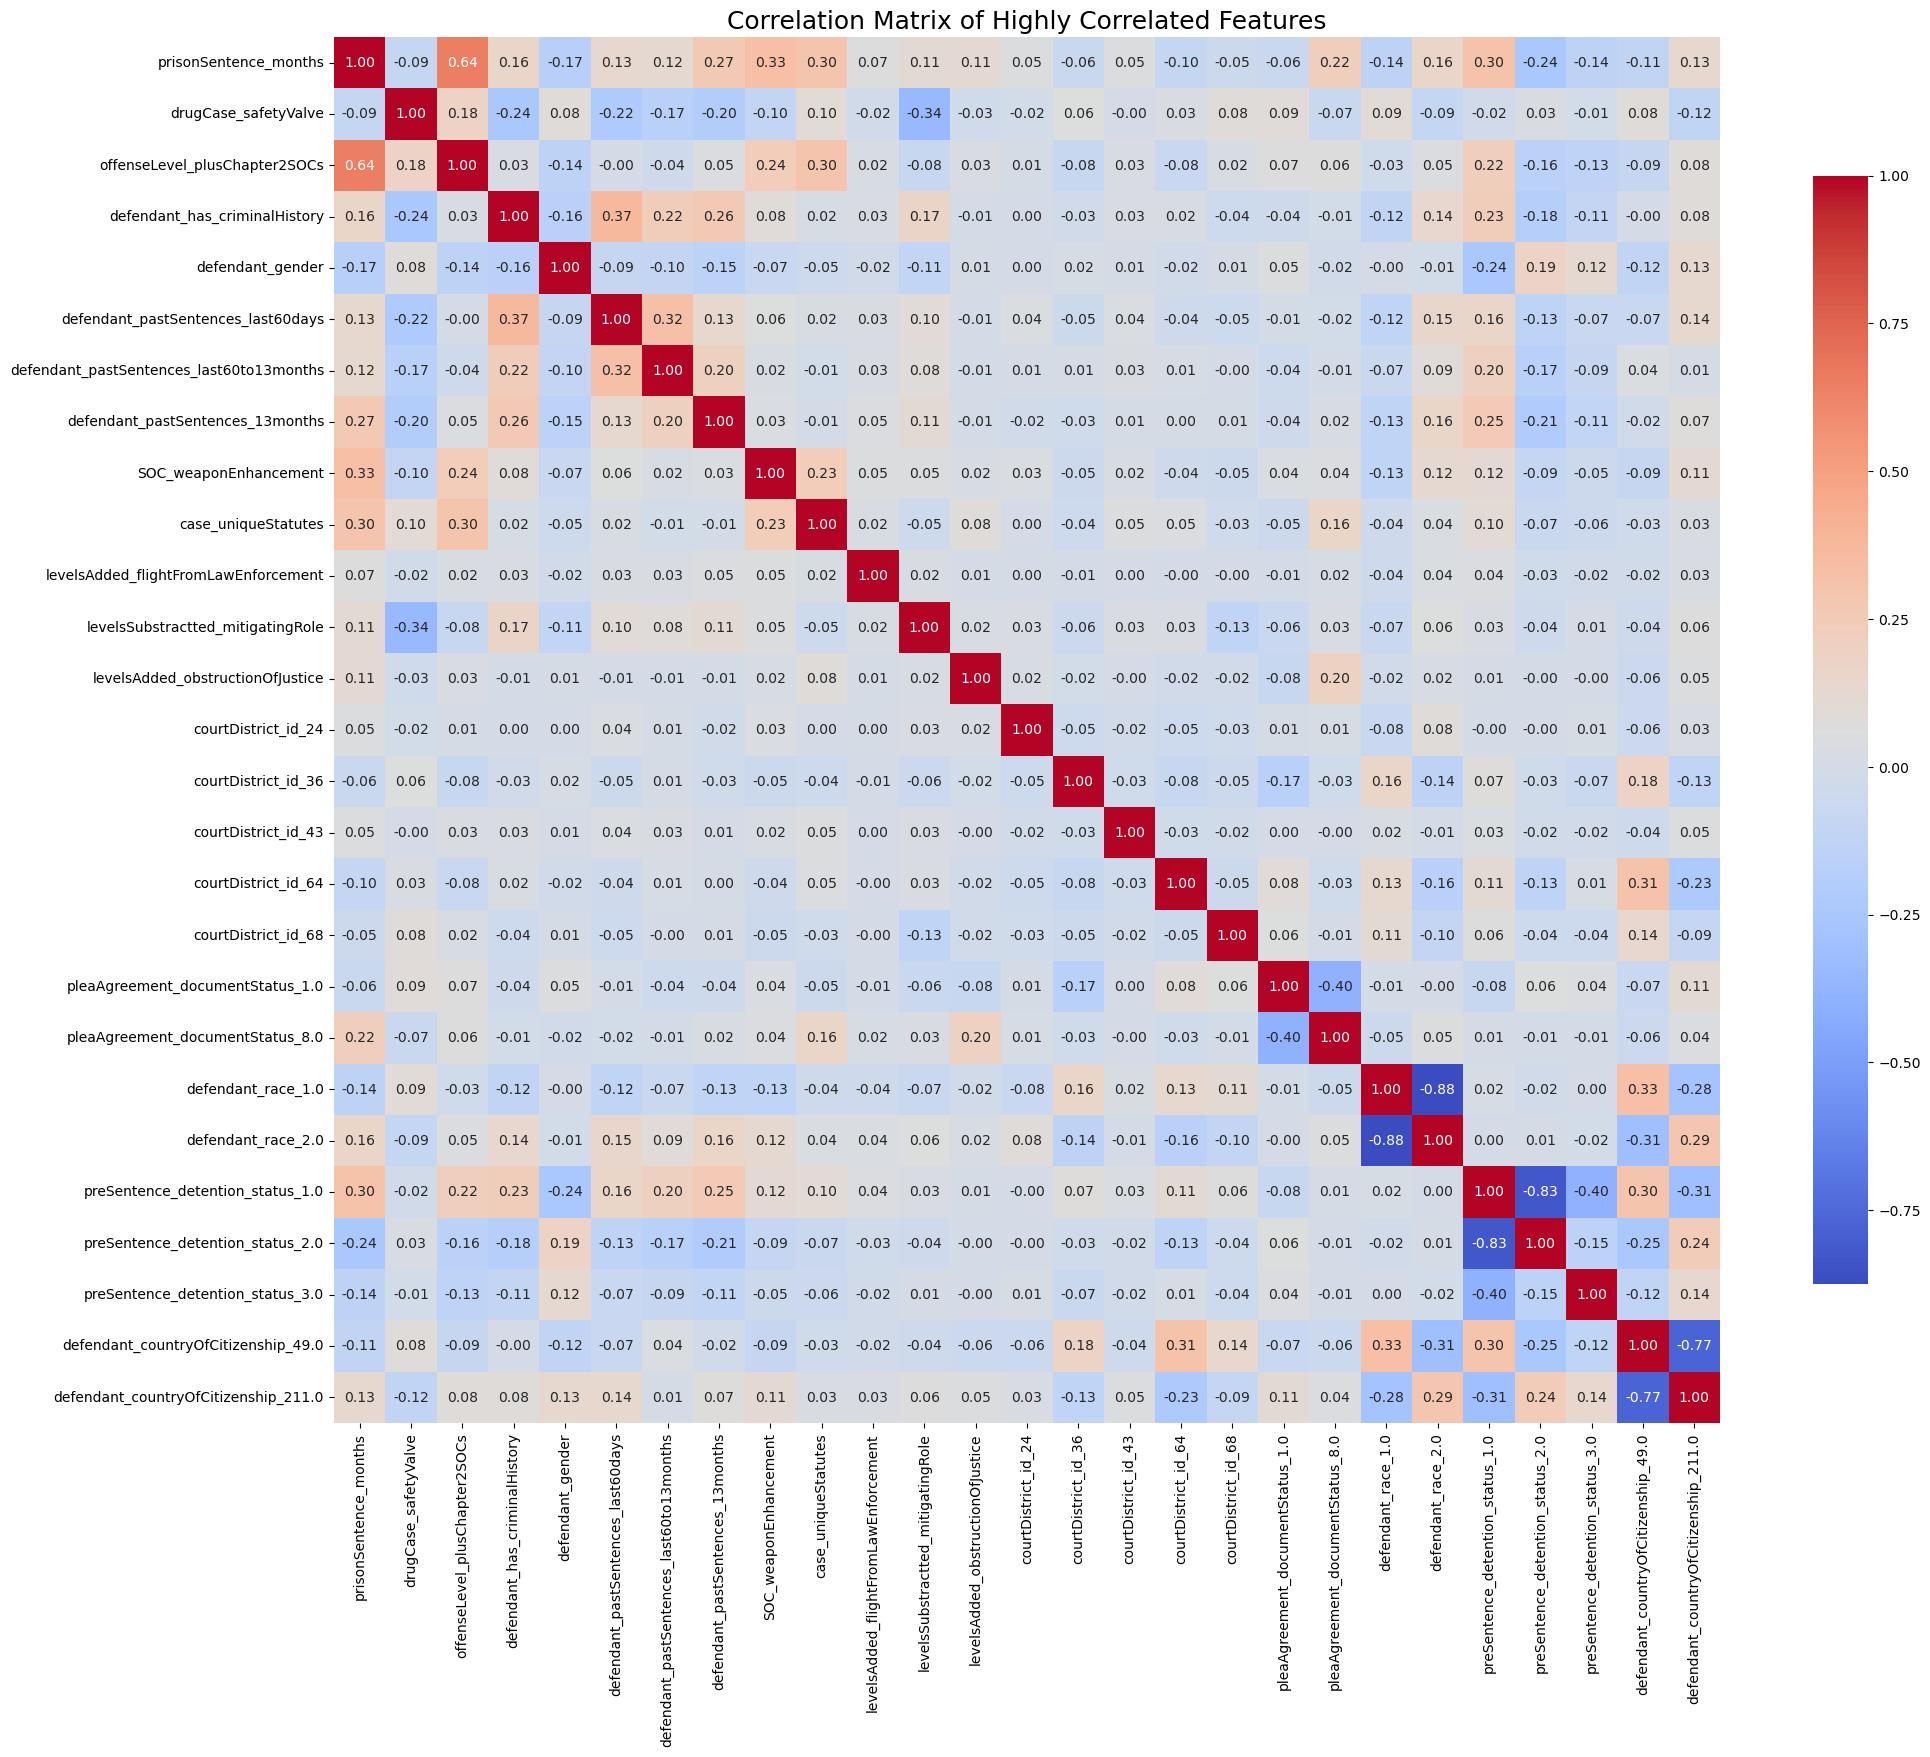

In [42]:
plt.figure(figsize=(24, 18))
corr = prison_sentences_onlyHighlyCorrelatedFeatures.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Highly Correlated Features", fontsize=18)

In [44]:
# dropping colinear features
prison_sentences_onlyHighlyCorrelatedFeatures.drop(columns=['defendant_countryOfCitizenship_49.0', 'preSentence_detention_status_2.0'], inplace=True)

C:\Users\ragal\AppData\Local\Temp\ipykernel_12212\3646086285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prison_sentences_onlyHighlyCorrelatedFeatures.drop(columns=['defendant_countryOfCitizenship_49.0', 'preSentence_detention_status_2.0'], inplace=True)


Text(0.5, 1.0, 'Correlation Matrix of Highly Correlated Features')

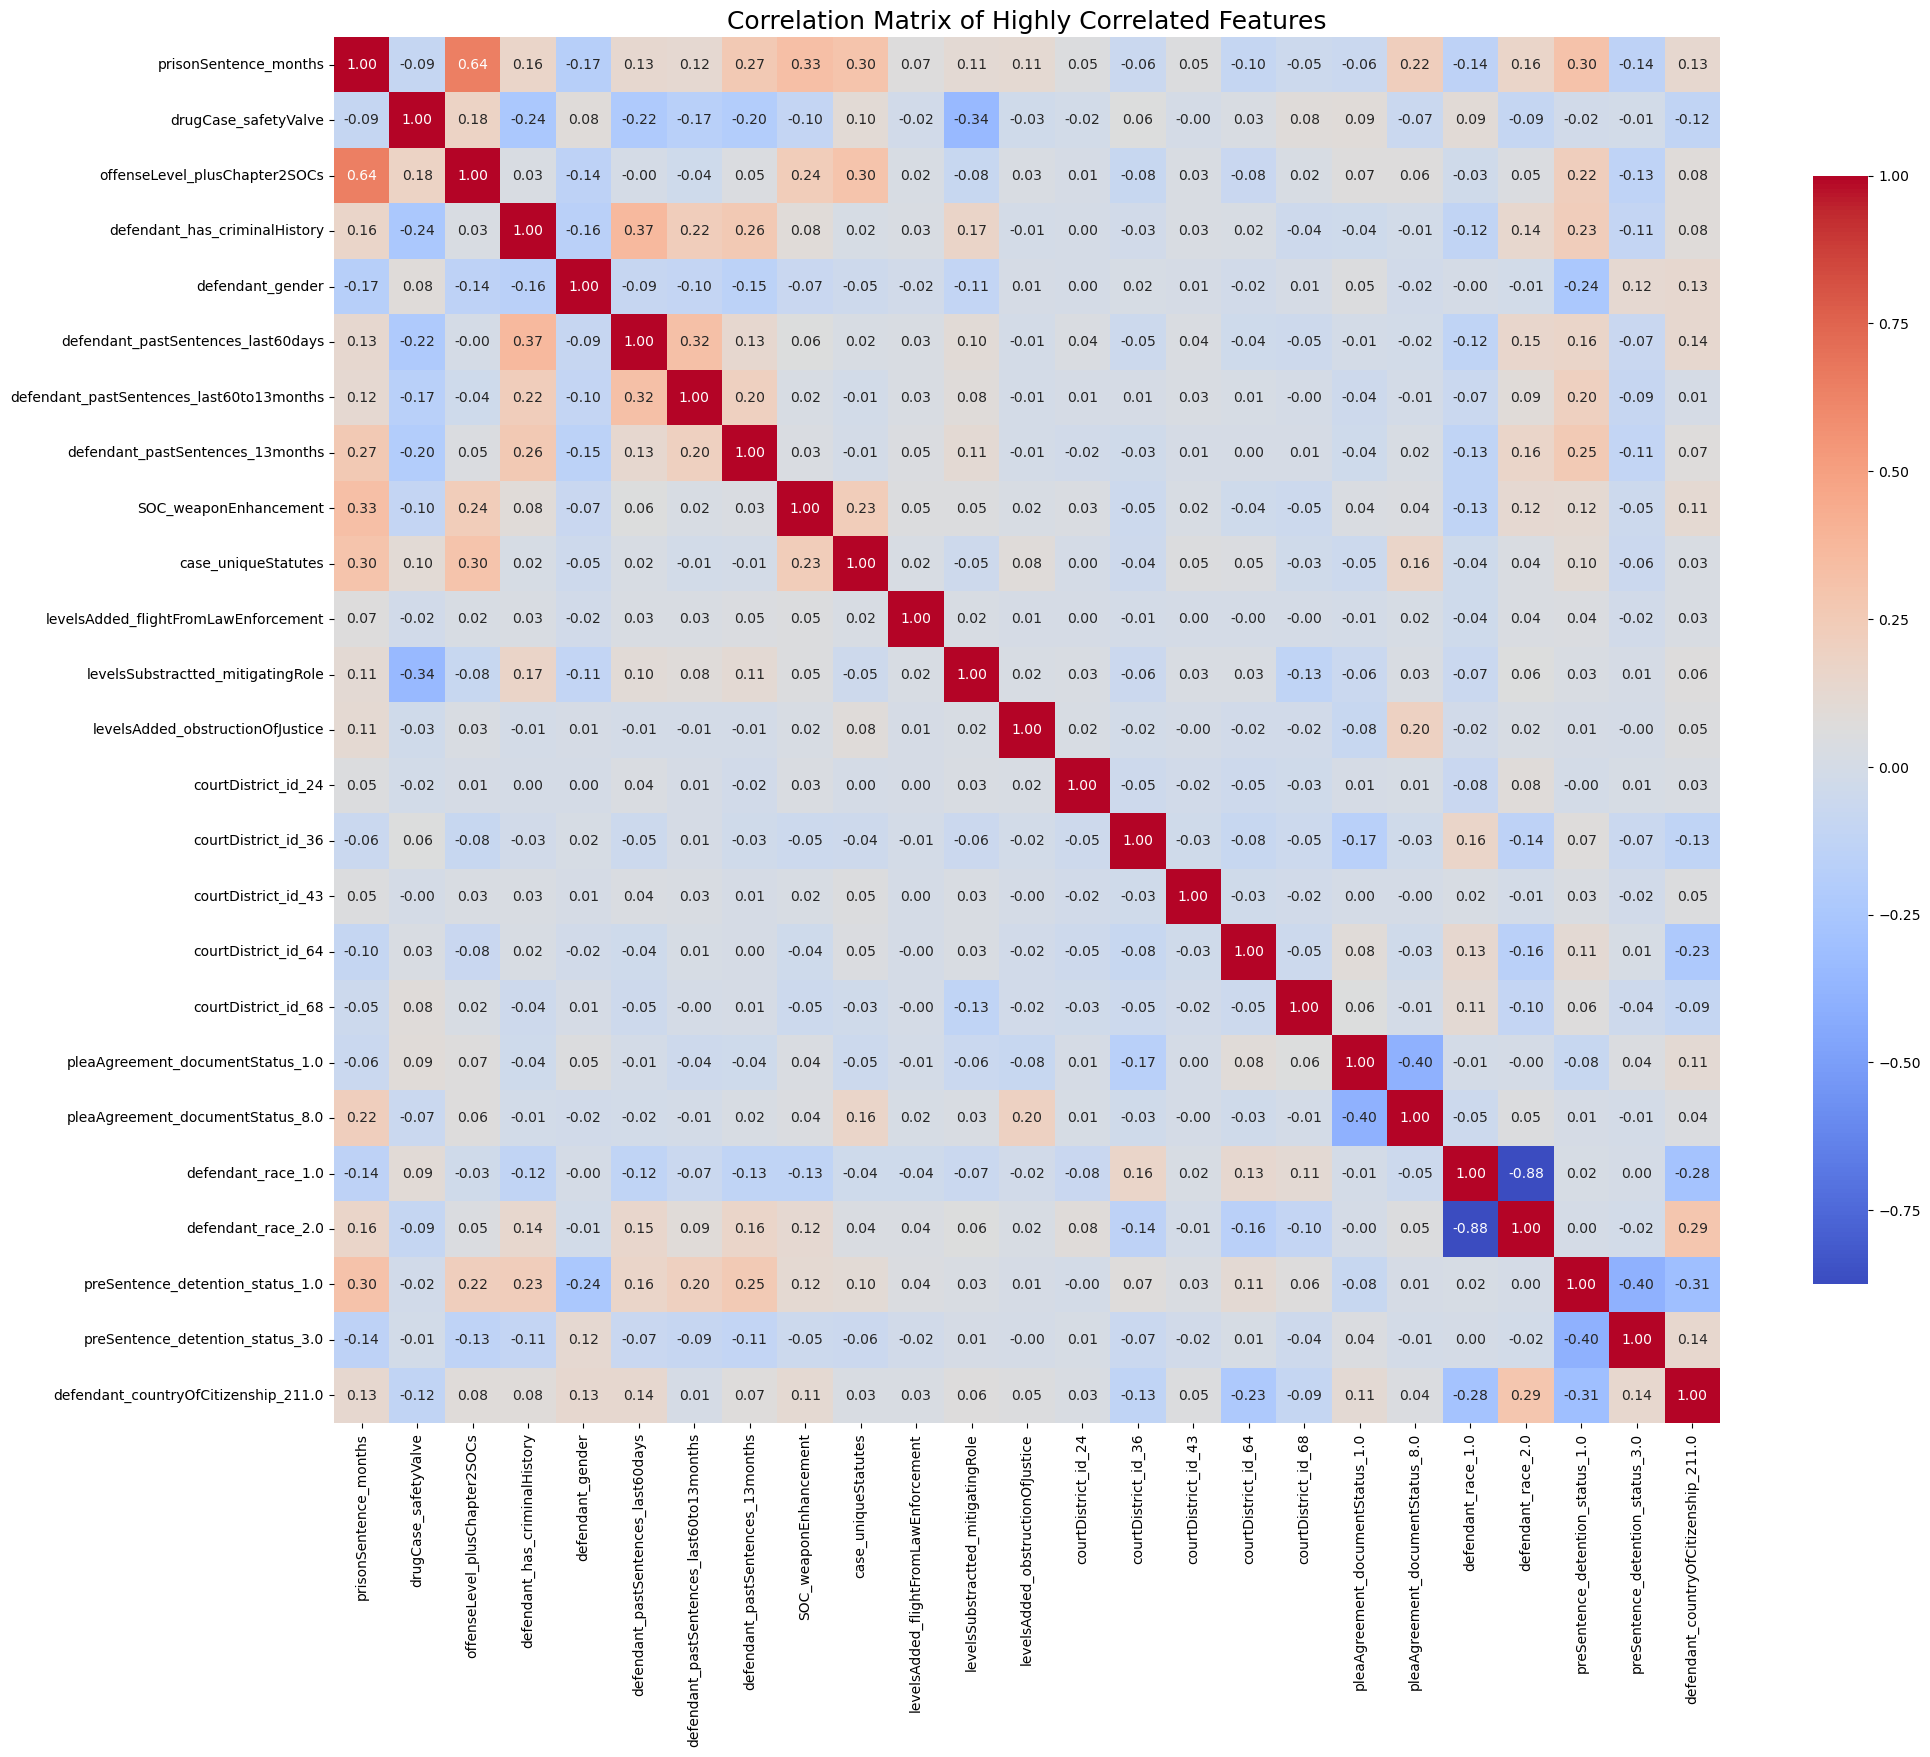

In [45]:
plt.figure(figsize=(24, 18))
corr = prison_sentences_onlyHighlyCorrelatedFeatures.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Highly Correlated Features", fontsize=18)

## Exporting the clean dataset

In [46]:
# Export the cleaned dataset to CSV
filename = './data/prison_sentences_cleaned_08.csv'
prison_sentences_onlyHighlyCorrelatedFeatures.to_csv(filename, index=False)
print(f"Exported cleaned dataset with shape: {prison_sentences_onlyHighlyCorrelatedFeatures.shape}")
print(f"Saved to: ", filename)

# written by Claude Sonnet 4 in Copilot using the following prompt:
# "export prison_sentences into a csv file"

Exported cleaned dataset with shape: (494469, 25)
Saved to:  ./data/prison_sentences_cleaned_08.csv
